## FLIP ROBO TECHNOLOGIES, BENGALURU
### <b> Evaluation Project 3 - HR Analytics Project- Understanding the Attrition in HR </b>
<b><em> By: Satya Jyothi </em></b>

<b><em> Batch: Internship 34 </em></b>

## <b>Problem Statement:</b>

<b><em>Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?</em></b>
    
    
#### <b>HR Analytics:</b>

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency.<b> Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.</b>

#### <b>Attrition in HR:</b>

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

<b><em>How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.</em></b>


#### <b>Attrition affecting Companies:</b>

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

<b>Note: You can find the dataset in the link below.

Downlaod Files:</b>

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [181]:
# importing required initial libraries
import numpy as np                 # Basic computation library
import pandas as pd                # for data wrangling purpose
import seaborn as sns              # For Visualization
import matplotlib.pyplot as plt    # For Plotting

import warnings
warnings.filterwarnings("ignore")  # Filtering warnings

In [182]:
# Reading csv file
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None) 
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [183]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 1470
No. of Columns : 35


In [184]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

#### Observations: ####
- **There are int and object data types available in the dataset**

In [185]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

#### Observations :
- **There are 1470 rows and 35 columns in the dataset.**
- **Out of 35 columns, there are 9 features with Object datatypes and rest are int64 datatypes**
- **There are some ordinal categorical variables with int datatype and will check in sub-sequent steps to identify them** 
- **Target Variable is 'Attrition' and it is classificaiton problem**

# Data Integrity Check

### Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [186]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

#### Observations:
- **No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe**

### Duplicate Values Check

In [187]:
df.duplicated().sum()

0

In [188]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

#### Observations: 
- **No duplicate values present in the dataframe**

### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [189]:
df_categorical=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for i in df_categorical:
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    print('\033[1m'+i,'Values Count'+'\033[0m')
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts())[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*100)

Attrition Values Count


Value  Count  % Count
0    No   1233     83.9
1   Yes    237     16.1

BusinessTravel Values Count


Value  Count  % Count
0      Travel_Rarely   1043     71.0
1  Travel_Frequently    277     18.8
2         Non-Travel    150     10.2

Department Values Count


Value  Count  % Count
0  Research & Development    961     65.4
1                   Sales    446     30.3
2         Human Resources     63      4.3

EducationField Values Count


Value  Count  % Count
0     Life Sciences    606     41.2
1           Medical    464     31.6
2         Marketing    159     10.8
3  Technical Degree    132      9.0
4             Other     82      5.6
5   Human Resources     27      1.8

Gender Values Count


Value  Count  % Count
0    Male    882     60.0
1  Female    588     40.0

JobRole Values Count


Value  Count  % Count
0            Sales Executive    326     22.2
1         Research Scientist    292     19.9
2      Laboratory Technician    259     17.6
3     Manufacturing Director    145      9.9
4  Healthcare Representative    131      8.9
5                    Manager    102      6.9
6       Sales Representative     83      5.6
7          Research Director     80      5.4
8            Human Resources     52      3.5

MaritalStatus Values Count


Value  Count  % Count
0   Married    673     45.8
1    Single    470     32.0
2  Divorced    327     22.2

Over18 Values Count


Value  Count  % Count
0     Y   1470    100.0

OverTime Values Count


Value  Count  % Count
0    No   1054     71.7
1   Yes    416     28.3

#### Observations:
- **Feature "Over18" has only one unique value, hence I will drop this column "Over18"**

In [190]:
df.drop(['Over18'],axis=1,inplace=True)

### Null Values Handling

In [191]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

0

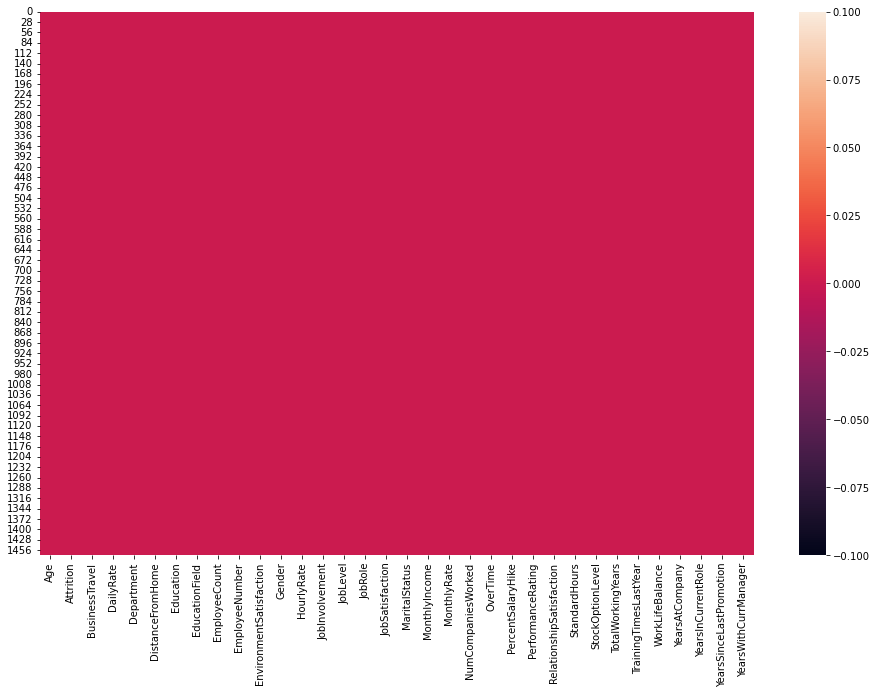

In [192]:
# Heatmap plot with null values
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [193]:
#Finding the percentage of data missing from the dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
null_values=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null=null_values.sort_values(by=["% Missing data"],ascending=False)
df_null=df_null.reset_index(drop=False)
df_null

Missing Values


index Data Type  Missing Values  % Missing data
0                        Age     int64               0             0.0
1              StandardHours     int64               0             0.0
2                MonthlyRate     int64               0             0.0
3         NumCompaniesWorked     int64               0             0.0
4                   OverTime    object               0             0.0
5          PercentSalaryHike     int64               0             0.0
6          PerformanceRating     int64               0             0.0
7   RelationshipSatisfaction     int64               0             0.0
8           StockOptionLevel     int64               0             0.0
9                  Attrition    object               0             0.0
10         TotalWorkingYears     int64               0             0.0
11     TrainingTimesLastYear     int64               0             0.0
12           WorkLifeBalance     int64               0             0.0
13            YearsAtCompany     int64               0             0.0
14        YearsInCurrentRole     int64               0             0.0
15   YearsSinceLastPromotion     int64               0             0.0
16             MonthlyIncome     int64               0             0.0
17             MaritalStatus    object               0             0.0
18           JobSatisfaction     int64               0             0.0
19                   JobRole    object               0             0.0
20                  JobLevel     int64               0             0.0
21            JobInvolvement     int64               0             0.0
22                HourlyRate     int64               0             0.0
23                    Gender    object               0             0.0
24   EnvironmentSatisfaction     int64               0             0.0
25            EmployeeNumber     int64               0             0.0
26             EmployeeCount     int64               0             0.0
27            EducationField    object               0             0.0
28                 Education     int64               0             0.0
29          DistanceFromHome     int64               0             0.0
30                Department    object               0             0.0
31                 DailyRate     int64               0             0.0
32            BusinessTravel    object               0             0.0
33      YearsWithCurrManager     int64               0             0.0

#### Observation:
- **No Null values are present in the dataset**

# Segregating columns based on data type for better EDA

In [194]:
df.shape

(1470, 34)

In [195]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']}

**Checking the actual data values in "int" datatype to identify if any 'categorical' data exist in 'int' data and segregate it for easy data analysis using the below steps**

In [196]:
# All 'int' datatype columns in the dataset
int_col=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df_int=df[int_col]
df_int.head(5)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   
3                3           2909        23159                   1   
4                2           3468        16632                   9   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0                  8                      0   
1             80                 1                 10                      3   
2             80                 0                  7                      3   
3             80                 0                  8                      3   
4             80                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [197]:
# Taking a closer look at "int" data to understand the variables better
for i in int_col:
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    print('\033[1m'+i,'Values Count'+'\033[0m')
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts()).iloc[j])
        percent_value_count.append(round(((df[i].value_counts()).iloc[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*100)

Age Values Count


Value  Count  % Count
0      35     78      5.3
1      34     77      5.2
2      36     69      4.7
3      31     69      4.7
4      29     68      4.6
5      32     61      4.1
6      30     60      4.1
7      33     58      3.9
8      38     58      3.9
9      40     57      3.9
10     37     50      3.4
11     27     48      3.3
12     28     48      3.3
13     42     46      3.1
14     39     42      2.9
15     45     41      2.8
16     41     40      2.7
17     26     39      2.7
18     44     33      2.2
19     46     33      2.2
20     43     32      2.2
21     50     30      2.0
22     25     26      1.8
23     24     26      1.8
24     49     24      1.6
25     47     24      1.6
26     55     22      1.5
27     51     19      1.3
28     53     19      1.3
29     48     19      1.3
30     54     18      1.2
31     52     18      1.2
32     22     16      1.1
33     56     14      1.0
34     23     14      1.0
35     58     14      1.0
36     21     13      0.9
37     20     11      0.7
38     59     10      0.7
39     19      9      0.6
40     18      8      0.5
41     60      5      0.3
42     57      4      0.3

DailyRate Values Count


Value  Count  % Count
0      691      6      0.4
1      408      5      0.3
2      530      5      0.3
3     1329      5      0.3
4     1082      5      0.3
5      329      5      0.3
6      829      4      0.3
7     1469      4      0.3
8      267      4      0.3
9      217      4      0.3
10    1283      4      0.3
11    1225      4      0.3
12     427      4      0.3
13     430      4      0.3
14     465      4      0.3
15    1490      4      0.3
16     715      4      0.3
17    1146      4      0.3
18    1157      4      0.3
19    1125      4      0.3
20     933      4      0.3
21     147      4      0.3
22     575      4      0.3
23     334      4      0.3
24     117      4      0.3
25     906      4      0.3
26     827      4      0.3
27     950      4      0.3
28     589      4      0.3
29     977      4      0.3
30     688      4      0.3
31     350      4      0.3
32     921      4      0.3
33     501      3      0.2
34     805      3      0.2
35    1092      3      0.2
36     607      3      0.2
37     970      3      0.2
38    1179      3      0.2
39     303      3      0.2
40    1169      3      0.2
41     930      3      0.2
42     661      3      0.2
43    1184      3      0.2
44     571      3      0.2
45    1395      3      0.2
46     240      3      0.2
47     337      3      0.2
48     750      3      0.2
49     192      3      0.2
50     142      3      0.2
51     855      3      0.2
52     959      3      0.2
53     482      3      0.2
54     528      3      0.2
55    1176      3      0.2
56     654      3      0.2
57     991      3      0.2
58    1001      3      0.2
59    1017      3      0.2
60    1199      3      0.2
61    1107      3      0.2
62     202      3      0.2
63     685      3      0.2
64    1313      3      0.2
65     810      3      0.2
66    1372      3      0.2
67     622      3      0.2
68     920      3      0.2
69    1117      3      0.2
70     444      3      0.2
71    1162      3      0.2
72    1018      3      0.2
73    1302      3      0.2
74    1476      3      0.2
75     884      3      0.2
76    1351      3      0.2
77    1485      3      0.2
78    1448      3      0.2
79     703      3      0.2
80    1495      3      0.2
81     471      3      0.2
82    1180      3      0.2
83     775      3      0.2
84     635      3      0.2
85     583      3      0.2
86     896      3      0.2
87    1396      3      0.2
88    1276      3      0.2
89     319      3      0.2
90    1277      3      0.2
91    1009      3      0.2
92    1099      3      0.2
93    1398      3      0.2
94     300      3      0.2
95     201      3      0.2
96    1219      3      0.2
97     945      3      0.2
98     330      3      0.2
99     735      3      0.2
100    746      3      0.2
101   1003      3      0.2
102    548      3      0.2
103    867      3      0.2
104   1404      3      0.2
105    419      3      0.2
106   1089      3      0.2
107   1115      3      0.2
108   1142      3      0.2
109    853      3      0.2
110    335      3      0.2
111    895      3      0.2
112    813      3      0.2
113    135      3      0.2
114    265      3      0.2
115    890      3      0.2
116    722      3      0.2
117    852      3      0.2
118   1097      3      0.2
119   1141      3      0.2
120    464      3      0.2
121   1240      3      0.2
122   1229      3      0.2
123    397      3      0.2
124   1206      3      0.2
125   1005      3      0.2
126    809      3      0.2
127    541      3      0.2
128    111      3      0.2
129   1400      3      0.2
130    216      3      0.2
131    469      3      0.2
132    793      3      0.2
133    638      3      0.2
134   1377      2      0.1
135   1368      2      0.1
136    770      2      0.1
137    422      2      0.1
138    798      2      0.1
139    928      2      0.1
140    645      2      0.1
141   1349      2      0.1
142   1050      2      0.1
143    247      2      0.1
144    266      2      0.1
145    672      2      0.1
146    984      2      0.1
147    98

DistanceFromHome Values Count


Value  Count  % Count
0       2    211     14.4
1       1    208     14.1
2      10     86      5.9
3       9     85      5.8
4       3     84      5.7
5       7     84      5.7
6       8     80      5.4
7       5     65      4.4
8       4     64      4.4
9       6     59      4.0
10     16     32      2.2
11     11     29      2.0
12     24     28      1.9
13     23     27      1.8
14     29     27      1.8
15     15     26      1.8
16     18     26      1.8
17     26     25      1.7
18     25     25      1.7
19     20     25      1.7
20     28     23      1.6
21     19     22      1.5
22     14     21      1.4
23     12     20      1.4
24     17     20      1.4
25     22     19      1.3
26     13     19      1.3
27     21     18      1.2
28     27     12      0.8

Education Values Count


Value  Count  % Count
0      3    572     38.9
1      4    398     27.1
2      2    282     19.2
3      1    170     11.6
4      5     48      3.3

EmployeeCount Values Count


Value  Count  % Count
0      1   1470    100.0

EmployeeNumber Values Count


Value  Count  % Count
0         1      1      0.1
1      1391      1      0.1
2      1389      1      0.1
3      1387      1      0.1
4      1383      1      0.1
5      1382      1      0.1
6      1380      1      0.1
7      1379      1      0.1
8      1377      1      0.1
9      1375      1      0.1
10     1374      1      0.1
11     1373      1      0.1
12     1372      1      0.1
13     1371      1      0.1
14     1369      1      0.1
15     1368      1      0.1
16     1367      1      0.1
17     1364      1      0.1
18     1363      1      0.1
19     1362      1      0.1
20     1361      1      0.1
21     1390      1      0.1
22     1392      1      0.1
23     1358      1      0.1
24     1394      1      0.1
25     1422      1      0.1
26     1421      1      0.1
27     1420      1      0.1
28     1419      1      0.1
29     1417      1      0.1
30     1415      1      0.1
31     1412      1      0.1
32     1411      1      0.1
33     1409      1      0.1
34     1408      1      0.1
35     1407      1      0.1
36     1405      1      0.1
37     1403      1      0.1
38     1402      1      0.1
39     1401      1      0.1
40     1399      1      0.1
41     1397      1      0.1
42     1396      1      0.1
43     1395      1      0.1
44     1360      1      0.1
45     1356      1      0.1
46     1424      1      0.1
47     1311      1      0.1
48     1309      1      0.1
49     1308      1      0.1
50     1307      1      0.1
51     1306      1      0.1
52     1304      1      0.1
53     1303      1      0.1
54     1301      1      0.1
55     1299      1      0.1
56     1298      1      0.1
57     1297      1      0.1
58     1296      1      0.1
59     1295      1      0.1
60     1294      1      0.1
61     1293      1      0.1
62     1292      1      0.1
63     1291      1      0.1
64     1289      1      0.1
65     1288      1      0.1
66     1286      1      0.1
67     1310      1      0.1
68     1312      1      0.1
69     1355      1      0.1
70     1314      1      0.1
71     1352      1      0.1
72     1350      1      0.1
73     1349      1      0.1
74     1346      1      0.1
75     1344      1      0.1
76     1340      1      0.1
77     1338      1      0.1
78     1336      1      0.1
79     1334      1      0.1
80     1333      1      0.1
81     1331      1      0.1
82     1329      1      0.1
83     1324      1      0.1
84     1322      1      0.1
85     1321      1      0.1
86     1319      1      0.1
87     1318      1      0.1
88     1317      1      0.1
89     1315      1      0.1
90     1423      1      0.1
91     1425      1      0.1
92     1283      1      0.1
93     1525      1      0.1
94     1522      1      0.1
95     1520      1      0.1
96     1516      1      0.1
97     1515      1      0.1
98     1514      1      0.1
99     1513      1      0.1
100    1509      1      0.1
101    1507      1      0.1
102    1506      1      0.1
103    1504      1      0.1
104    1503      1      0.1
105    1502      1      0.1
106    1501      1      0.1
107    1499      1      0.1
108    1497      1      0.1
109    1496      1      0.1
110    1495      1      0.1
111    1494      1      0.1
112    1492      1      0.1
113    1523      1      0.1
114    1527      1      0.1
115    1487      1      0.1
116    1529      1      0.1
117    1554      1      0.1
118    1553      1      0.1
119    1552      1      0.1
120    1551      1      0.1
121    1550      1      0.1
122    1549      1      0.1
123    1548      1      0.1
124    1547      1      0.1
125    1546      1      0.1
126    1545      1      0.1
127    1544      1      0.1
128    1543      1      0.1
129    1542      1      0.1
130    1541      1      0.1
131    1539      1      0.1
132    1537      1      0.1
133    1535      1      0.1
134    1534      1      0.1
135    1533      1      0.1
136    1489      1      0.1
137    1486      1      0.1
138    1427      1      0.1
139    1459      1      0.1
140    1457      1      0.1
141    1453      1      0.1
14

EnvironmentSatisfaction Values Count


Value  Count  % Count
0      3    453     30.8
1      4    446     30.3
2      2    287     19.5
3      1    284     19.3

HourlyRate Values Count


Value  Count  % Count
0      66     29      2.0
1      98     28      1.9
2      42     28      1.9
3      48     28      1.9
4      84     28      1.9
5      57     27      1.8
6      79     27      1.8
7      96     27      1.8
8      54     26      1.8
9      52     26      1.8
10     87     26      1.8
11     56     26      1.8
12     46     25      1.7
13     92     25      1.7
14     72     25      1.7
15     32     24      1.6
16     43     24      1.6
17     73     24      1.6
18     45     24      1.6
19     95     23      1.6
20     62     23      1.6
21     82     23      1.6
22     78     23      1.6
23     60     23      1.6
24     83     22      1.5
25     81     22      1.5
26     51     22      1.5
27     86     22      1.5
28     94     22      1.5
29     59     21      1.4
30     77     21      1.4
31     80     21      1.4
32     97     21      1.4
33     88     21      1.4
34     41     21      1.4
35     74     20      1.4
36     99     20      1.4
37     75     20      1.4
38     61     20      1.4
39     30     19      1.3
40     65     19      1.3
41     76     19      1.3
42     33     19      1.3
43    100     19      1.3
44     90     19      1.3
45     67     19      1.3
46     64     19      1.3
47     44     18      1.2
48     40     18      1.2
49     91     18      1.2
50     35     18      1.2
51     49     18      1.2
52     71     18      1.2
53     85     18      1.2
54     36     18      1.2
55     37     18      1.2
56     58     17      1.2
57     39     17      1.2
58     47     16      1.1
59     63     16      1.1
60     70     16      1.1
61     55     16      1.1
62     50     16      1.1
63     93     16      1.1
64     89     15      1.0
65     69     15      1.0
66     31     15      1.0
67     53     14      1.0
68     68     14      1.0
69     38     13      0.9
70     34     12      0.8

JobInvolvement Values Count


Value  Count  % Count
0      3    868     59.0
1      2    375     25.5
2      4    144      9.8
3      1     83      5.6

JobLevel Values Count


Value  Count  % Count
0      1    543     36.9
1      2    534     36.3
2      3    218     14.8
3      4    106      7.2
4      5     69      4.7

JobSatisfaction Values Count


Value  Count  % Count
0      4    459     31.2
1      3    442     30.1
2      1    289     19.7
3      2    280     19.0

MonthlyIncome Values Count


Value  Count  % Count
0      2342      4      0.3
1      6142      3      0.2
2      2741      3      0.2
3      2559      3      0.2
4      2610      3      0.2
5      2451      3      0.2
6      5562      3      0.2
7      3452      3      0.2
8      2380      3      0.2
9      6347      3      0.2
10     2404      3      0.2
11     2956      2      0.1
12     2127      2      0.1
13     2515      2      0.1
14     2187      2      0.1
15     4941      2      0.1
16     2942      2      0.1
17     6811      2      0.1
18     5238      2      0.1
19     5484      2      0.1
20     3162      2      0.1
21     2936      2      0.1
22     2033      2      0.1
23     3420      2      0.1
24     2096      2      0.1
25     6272      2      0.1
26     2377      2      0.1
27     2973      2      0.1
28     4284      2      0.1
29     2008      2      0.1
30     5346      2      0.1
31     5204      2      0.1
32    17328      2      0.1
33     5228      2      0.1
34     2042      2      0.1
35     2044      2      0.1
36     2073      2      0.1
37     3294      2      0.1
38     5993      2      0.1
39     5769      2      0.1
40     2439      2      0.1
41     5405      2      0.1
42     4898      2      0.1
43     2782      2      0.1
44     6804      2      0.1
45     2340      2      0.1
46     2362      2      0.1
47     4876      2      0.1
48     2372      2      0.1
49     2109      2      0.1
50     2657      2      0.1
51     5410      2      0.1
52    10609      2      0.1
53     2436      2      0.1
54     2177      2      0.1
55     2450      2      0.1
56     6500      2      0.1
57     4639      2      0.1
58     2070      2      0.1
59     3760      2      0.1
60     2500      2      0.1
61     3072      2      0.1
62     5561      2      0.1
63     6397      2      0.1
64     4907      2      0.1
65     4779      2      0.1
66     4724      2      0.1
67     2323      2      0.1
68     5467      2      0.1
69     2996      2      0.1
70     2587      2      0.1
71     5605      2      0.1
72     2720      2      0.1
73     4968      2      0.1
74     5343      2      0.1
75     3904      2      0.1
76     4197      2      0.1
77     2911      2      0.1
78    10096      2      0.1
79     2028      2      0.1
80     9980      2      0.1
81     2406      2      0.1
82     6162      2      0.1
83     4014      2      0.1
84    17861      2      0.1
85     2269      2      0.1
86     7756      2      0.1
87     2564      2      0.1
88     2367      2      0.1
89     2132      2      0.1
90     4025      2      0.1
91     4011      2      0.1
92     2886      2      0.1
93     3407      2      0.1
94     2293      2      0.1
95     5003      2      0.1
96     4148      2      0.1
97     4936      2      0.1
98     4440      2      0.1
99     5304      2      0.1
100    2743      2      0.1
101    5473      2      0.1
102    2909      2      0.1
103    9824      2      0.1
104    2693      2      0.1
105    3038      2      0.1
106    2703      2      0.1
107    2258      2      0.1
108    4306      2      0.1
109    3423      1      0.1
110    1611      1      0.1
111   13142      1      0.1
112    5363      1      0.1
113    6674      1      0.1
114    5071      1      0.1
115    2534      1      0.1
116    7094      1      0.1
117    2272      1      0.1
118   13695      1      0.1
119    6151      1      0.1
120    3180      1      0.1
121   13402      1      0.1
122   16880      1      0.1
123    2029      1      0.1
124    4627      1      0.1
125    4789      1      0.1
126    1563      1      0.1
127    6377      1      0.1
128    5429      1      0.1
129    2561      1      0.1
130    4591      1      0.1
131    2785      1      0.1
132    7898      1      0.1
133    2387      1      0.1
134    9094      1      0.1
135   11916      1      0.1
136    8376      1      0.1
137    2302      1      0.1
138    4534      1      0.1
139   19187      1      0.1
140   19717      1      0.1
141   16328      1      0.1
14

MonthlyRate Values Count


Value  Count  % Count
0      4223      3      0.2
1      9150      3      0.2
2      9558      2      0.1
3     12858      2      0.1
4     22074      2      0.1
5     25326      2      0.1
6      9096      2      0.1
7     13008      2      0.1
8     12355      2      0.1
9      7744      2      0.1
10     6881      2      0.1
11    11737      2      0.1
12    22102      2      0.1
13     3339      2      0.1
14    11162      2      0.1
15     5355      2      0.1
16     6670      2      0.1
17    24444      2      0.1
18    16154      2      0.1
19    23016      2      0.1
20    15891      2      0.1
21    15318      2      0.1
22     9129      2      0.1
23    10494      2      0.1
24    21981      2      0.1
25    20364      2      0.1
26    11652      2      0.1
27    15986      2      0.1
28     2125      2      0.1
29    21534      2      0.1
30    11591      2      0.1
31    17001      2      0.1
32     4658      2      0.1
33    19373      2      0.1
34    20284      2      0.1
35     6319      2      0.1
36     6069      2      0.1
37     8952      2      0.1
38     2755      2      0.1
39     4156      2      0.1
40     7324      2      0.1
41    11693      1      0.1
42     4732      1      0.1
43    23288      1      0.1
44    18830      1      0.1
45    11882      1      0.1
46     6163      1      0.1
47    17491      1      0.1
48    13888      1      0.1
49    13035      1      0.1
50    18235      1      0.1
51     9277      1      0.1
52    15748      1      0.1
53    17235      1      0.1
54    17285      1      0.1
55    19293      1      0.1
56     7100      1      0.1
57    20003      1      0.1
58     9731      1      0.1
59    14075      1      0.1
60    12477      1      0.1
61     3449      1      0.1
62    20497      1      0.1
63     5182      1      0.1
64    10846      1      0.1
65    14222      1      0.1
66    13953      1      0.1
67    15395      1      0.1
68     3567      1      0.1
69    21057      1      0.1
70    24232      1      0.1
71     4257      1      0.1
72    20392      1      0.1
73    24439      1      0.1
74    17334      1      0.1
75     6992      1      0.1
76     5747      1      0.1
77    22455      1      0.1
78     5494      1      0.1
79    22957      1      0.1
80     8532      1      0.1
81     4022      1      0.1
82    26582      1      0.1
83    19305      1      0.1
84    16392      1      0.1
85    14669      1      0.1
86     8319      1      0.1
87     8935      1      0.1
88    13352      1      0.1
89    25927      1      0.1
90     4297      1      0.1
91     2690      1      0.1
92    17588      1      0.1
93    19461      1      0.1
94     4050      1      0.1
95    23553      1      0.1
96     9075      1      0.1
97    12023      1      0.1
98    23631      1      0.1
99    22154      1      0.1
100   22845      1      0.1
101    6762      1      0.1
102    2261      1      0.1
103   18706      1      0.1
104   26076      1      0.1
105    6527      1      0.1
106   22422      1      0.1
107   25681      1      0.1
108   12414      1      0.1
109   16616      1      0.1
110   16998      1      0.1
111   12530      1      0.1
112   24200      1      0.1
113    8192      1      0.1
114   16143      1      0.1
115   15428      1      0.1
116   23757      1      0.1
117   19719      1      0.1
118    7103      1      0.1
119   16192      1      0.1
120    2939      1      0.1
121    7815      1      0.1
122   17485      1      0.1
123   15747      1      0.1
124   11929      1      0.1
125   20948      1      0.1
126    2721      1      0.1
127    7152      1      0.1
128    9282      1      0.1
129   11827      1      0.1
130   23070      1      0.1
131    4668      1      0.1
132    3173      1      0.1
133   18611      1      0.1
134    4585      1      0.1
135   24152      1      0.1
136    7288      1      0.1
137    3031      1      0.1
138   24052      1      0.1
139    4944      1      0.1
140   24450      1      0.1
141   12288      1      0.1
14

NumCompaniesWorked Values Count


Value  Count  % Count
0      1    521     35.4
1      0    197     13.4
2      3    159     10.8
3      2    146      9.9
4      4    139      9.5
5      7     74      5.0
6      6     70      4.8
7      5     63      4.3
8      9     52      3.5
9      8     49      3.3

PercentSalaryHike Values Count


Value  Count  % Count
0      11    210     14.3
1      13    209     14.2
2      14    201     13.7
3      12    198     13.5
4      15    101      6.9
5      18     89      6.1
6      17     82      5.6
7      16     78      5.3
8      19     76      5.2
9      22     56      3.8
10     20     55      3.7
11     21     48      3.3
12     23     28      1.9
13     24     21      1.4
14     25     18      1.2

PerformanceRating Values Count


Value  Count  % Count
0      3   1244     84.6
1      4    226     15.4

RelationshipSatisfaction Values Count


Value  Count  % Count
0      3    459     31.2
1      4    432     29.4
2      2    303     20.6
3      1    276     18.8

StandardHours Values Count


Value  Count  % Count
0     80   1470    100.0

StockOptionLevel Values Count


Value  Count  % Count
0      0    631     42.9
1      1    596     40.5
2      2    158     10.7
3      3     85      5.8

TotalWorkingYears Values Count


Value  Count  % Count
0      10    202     13.7
1       6    125      8.5
2       8    103      7.0
3       9     96      6.5
4       5     88      6.0
5       7     81      5.5
6       1     81      5.5
7       4     63      4.3
8      12     48      3.3
9       3     42      2.9
10     15     40      2.7
11     16     37      2.5
12     11     36      2.4
13     13     36      2.4
14     21     34      2.3
15     17     33      2.2
16      2     31      2.1
17     14     31      2.1
18     20     30      2.0
19     18     27      1.8
20     19     22      1.5
21     23     22      1.5
22     22     21      1.4
23     24     18      1.2
24     25     14      1.0
25     28     14      1.0
26     26     14      1.0
27      0     11      0.7
28     29     10      0.7
29     31      9      0.6
30     32      9      0.6
31     30      7      0.5
32     33      7      0.5
33     27      7      0.5
34     36      6      0.4
35     34      5      0.3
36     37      4      0.3
37     35      3      0.2
38     40      2      0.1
39     38      1      0.1

TrainingTimesLastYear Values Count


Value  Count  % Count
0      2    547     37.2
1      3    491     33.4
2      4    123      8.4
3      5    119      8.1
4      1     71      4.8
5      6     65      4.4
6      0     54      3.7

WorkLifeBalance Values Count


Value  Count  % Count
0      3    893     60.7
1      2    344     23.4
2      4    153     10.4
3      1     80      5.4

YearsAtCompany Values Count


Value  Count  % Count
0       5    196     13.3
1       1    171     11.6
2       3    128      8.7
3       2    127      8.6
4      10    120      8.2
5       4    110      7.5
6       7     90      6.1
7       9     82      5.6
8       8     80      5.4
9       6     76      5.2
10      0     44      3.0
11     11     32      2.2
12     20     27      1.8
13     13     24      1.6
14     15     20      1.4
15     14     18      1.2
16     22     15      1.0
17     12     14      1.0
18     21     14      1.0
19     18     13      0.9
20     16     12      0.8
21     19     11      0.7
22     17      9      0.6
23     24      6      0.4
24     33      5      0.3
25     25      4      0.3
26     26      4      0.3
27     31      3      0.2
28     32      3      0.2
29     27      2      0.1
30     36      2      0.1
31     29      2      0.1
32     23      2      0.1
33     37      1      0.1
34     40      1      0.1
35     34      1      0.1
36     30      1      0.1

YearsInCurrentRole Values Count


Value  Count  % Count
0       2    372     25.3
1       0    244     16.6
2       7    222     15.1
3       3    135      9.2
4       4    104      7.1
5       8     89      6.1
6       9     67      4.6
7       1     57      3.9
8       6     37      2.5
9       5     36      2.4
10     10     29      2.0
11     11     22      1.5
12     13     14      1.0
13     14     11      0.7
14     12     10      0.7
15     15      8      0.5
16     16      7      0.5
17     17      4      0.3
18     18      2      0.1

YearsSinceLastPromotion Values Count


Value  Count  % Count
0       0    581     39.5
1       1    357     24.3
2       2    159     10.8
3       7     76      5.2
4       4     61      4.1
5       3     52      3.5
6       5     45      3.1
7       6     32      2.2
8      11     24      1.6
9       8     18      1.2
10      9     17      1.2
11     15     13      0.9
12     13     10      0.7
13     12     10      0.7
14     14      9      0.6
15     10      6      0.4

YearsWithCurrManager Values Count


Value  Count  % Count
0       2    344     23.4
1       0    263     17.9
2       7    216     14.7
3       3    142      9.7
4       8    107      7.3
5       4     98      6.7
6       1     76      5.2
7       9     64      4.4
8       5     31      2.1
9       6     29      2.0
10     10     27      1.8
11     11     22      1.5
12     12     18      1.2
13     13     14      1.0
14     17      7      0.5
15     15      5      0.3
16     14      5      0.3
17     16      2      0.1

#### Observations:
- **Feature "StandardHours" has only one unique value, hence I will drop this column "StandardHours"**
- **Variables 'EmployeeCount','EmployeeNumber' don't contribute to the model learning, hence dropping**

In [198]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)

In [199]:
df.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0

**By having a closer look at the values of "int" datatype variables and by looking at the description of the datset features, "int" datatype data is further divided into two categories for easy data analysis**

In [200]:
# Integer data with categorical values i.e. categorical data with numeric values
df_int_cat=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
# Integere data without categorical values i.e. discrete numeric data
df_int_nocat=['Age','DailyRate','DistanceFromHome','HourlyRate','EmployeeCount','EmployeeNumber','MonthlyIncome', 'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','StandardHours','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
 'YearsWithCurrManager']

In [201]:
df.shape

(1470, 31)

In [202]:
#Object data (categorical data with string values)
df_cat_str=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [203]:
# All variables with numeric data
df_numerical=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
 'YearsWithCurrManager']
df_numerical=df[df_numerical]

In [204]:
# All variables with categorical data (both string data and int data)
df_categorical=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
df_categorical=df[df_categorical]

In [205]:
df_numerical.shape

(1470, 14)

In [206]:
df_categorical.shape

(1470, 17)

# Statistical Summary:

In [207]:
# Statistical summary for numerical data
df_numerical.describe().T.round(2)

count      mean      std     min     25%      50%  \
Age                      1470.0     36.92     9.14    18.0    30.0     36.0   
DailyRate                1470.0    802.49   403.51   102.0   465.0    802.0   
DistanceFromHome         1470.0      9.19     8.11     1.0     2.0      7.0   
HourlyRate               1470.0     65.89    20.33    30.0    48.0     66.0   
MonthlyIncome            1470.0   6502.93  4707.96  1009.0  2911.0   4919.0   
MonthlyRate              1470.0  14313.10  7117.79  2094.0  8047.0  14235.5   
NumCompaniesWorked       1470.0      2.69     2.50     0.0     1.0      2.0   
PercentSalaryHike        1470.0     15.21     3.66    11.0    12.0     14.0   
TotalWorkingYears        1470.0     11.28     7.78     0.0     6.0     10.0   
TrainingTimesLastYear    1470.0      2.80     1.29     0.0     2.0      3.0   
YearsAtCompany           1470.0      7.01     6.13     0.0     3.0      5.0   
YearsInCurrentRole       1470.0      4.23     3.62     0.0     2.0      3.0   
YearsSinceLastPromotion  1470.0      2.19     3.22     0.0     0.0      1.0   
YearsWithCurrManager     1470.0      4.12     3.57     0.0     2.0      3.0   

                              75%      max  
Age                         43.00     60.0  
DailyRate                 1157.00   1499.0  
DistanceFromHome            14.00     29.0  
HourlyRate                  83.75    100.0  
MonthlyIncome             8379.00  19999.0  
MonthlyRate              20461.50  26999.0  
NumCompaniesWorked           4.00      9.0  
PercentSalaryHike           18.00     25.0  
TotalWorkingYears           15.00     40.0  
TrainingTimesLastYear        3.00      6.0  
YearsAtCompany               9.00     40.0  
YearsInCurrentRole           7.00     18.0  
YearsSinceLastPromotion      3.00     15.0  
YearsWithCurrManager         7.00     17.0

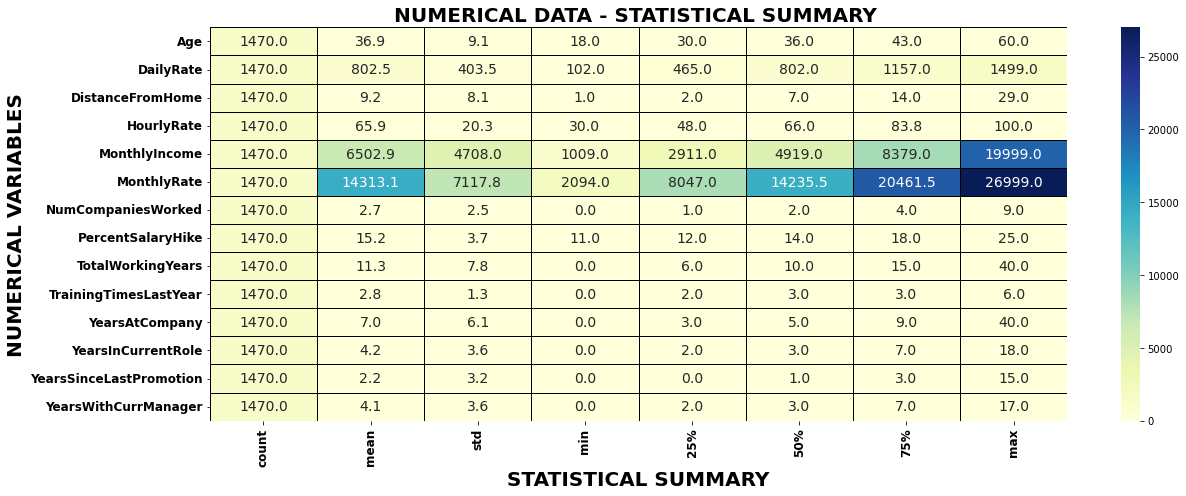

In [208]:
# Visualizing the Statistical summary for numerical data using heatmap.
plt.figure(figsize=(18,7))
sns.heatmap(df_numerical.describe().T,linewidths = 0.5,linecolor='black',fmt='0.1f',annot = True,cmap="YlGnBu",annot_kws={"size": 14})
plt.title("NUMERICAL DATA - STATISTICAL SUMMARY ",fontsize=20, fontweight='bold')
plt.xlabel("STATISTICAL SUMMARY", fontsize=20,fontweight='bold')
plt.ylabel("NUMERICAL VARIABLES", fontsize=20,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **count is same for all columns. Hence,no null values are present.**
- **Mean is greater than median for most of the features,shows the data is right skewed**
- **Minimum Empolyee Age is 18 and Maximum age of employee 60 and Average distance from home is 9.2 KM. It means that most of employee travel atleast 18 KM in day from home to office.**
- **Maximum and minimum distance from house to offfice is 29km and 1km.Avg distance is 9km.**
- **minimum Dailyrate is 102 and maximum is 1499.Avg Dailyrate is 803**
- **Large difference between 75% and max shows presence of outliers**
- **50% of Employees has worked atleast 2 companies previously.**
- **Maximum working years and years at company are 40**
- **percent salary hike vary between 11 to 25.Average percent of salary hike is 15**

In [209]:
# Statistical summary for object data type
df_categorical.describe(include='O').T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

#### Observations:
- **count is same for all columns. Hence,no null values are present.**
- **unique shows number of unique values present in each column**
- **top shows the mode of each column.life sciences is the most frequently occured EducationField**
- **freq is frequency of model value in each column**

# Visualization of data

### Univariate and Bivariate Graphical Analysis for Categorical data - Object Data Type

In [210]:
df_cat_str=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [211]:
len(df_cat_str)

8

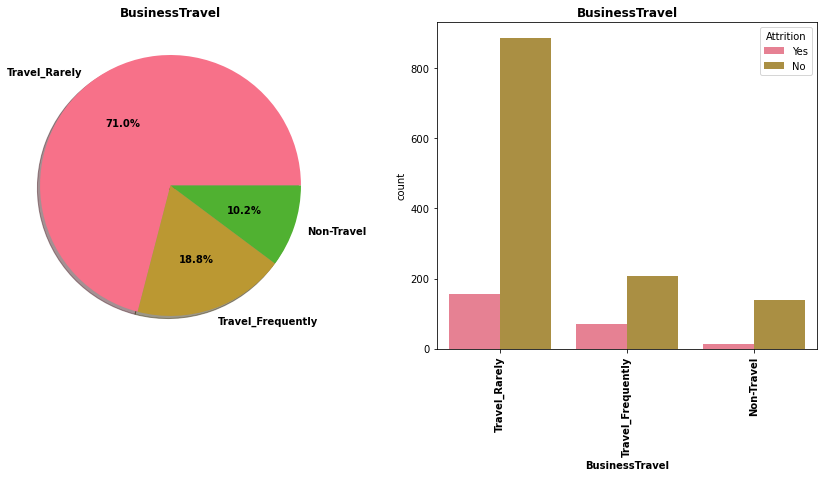

Observations for feature BUSINESSTRAVEL:


Value  Count  % Count
0      Travel_Rarely   1043     71.0
1  Travel_Frequently    277     18.8
2         Non-Travel    150     10.2

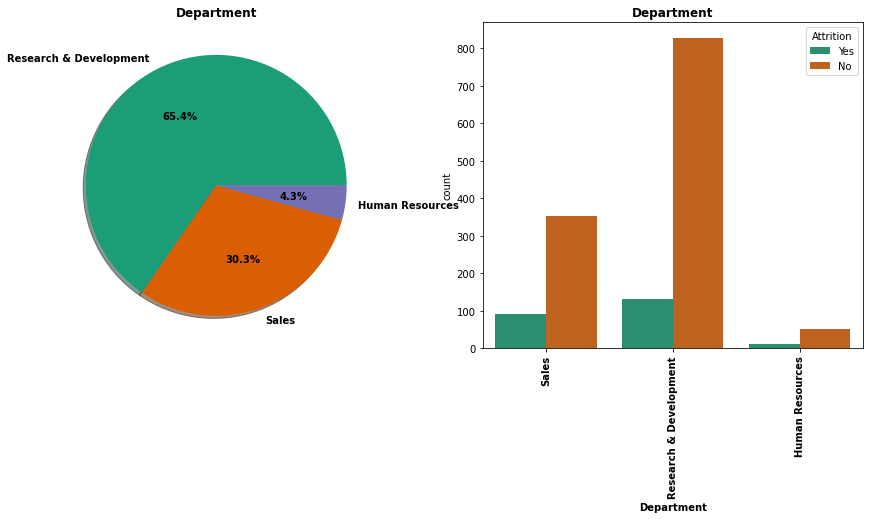

Observations for feature DEPARTMENT:


Value  Count  % Count
0  Research & Development    961     65.4
1                   Sales    446     30.3
2         Human Resources     63      4.3

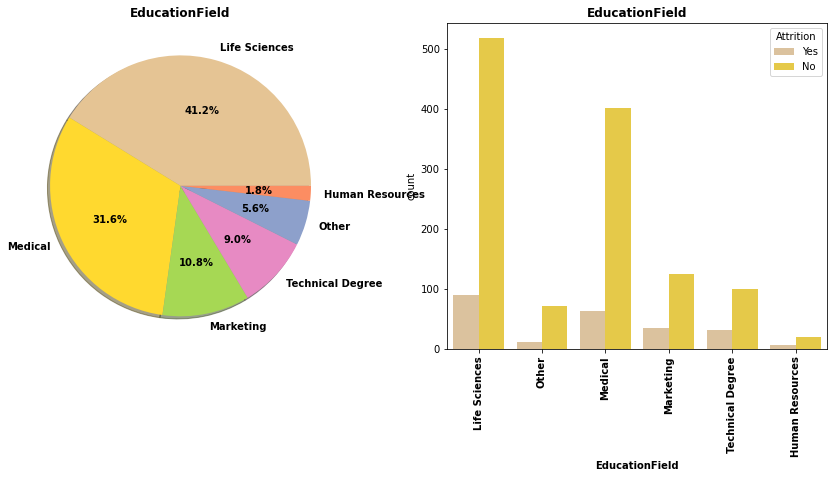

Observations for feature EDUCATIONFIELD:


Value  Count  % Count
0     Life Sciences    606     41.2
1           Medical    464     31.6
2         Marketing    159     10.8
3  Technical Degree    132      9.0
4             Other     82      5.6
5   Human Resources     27      1.8

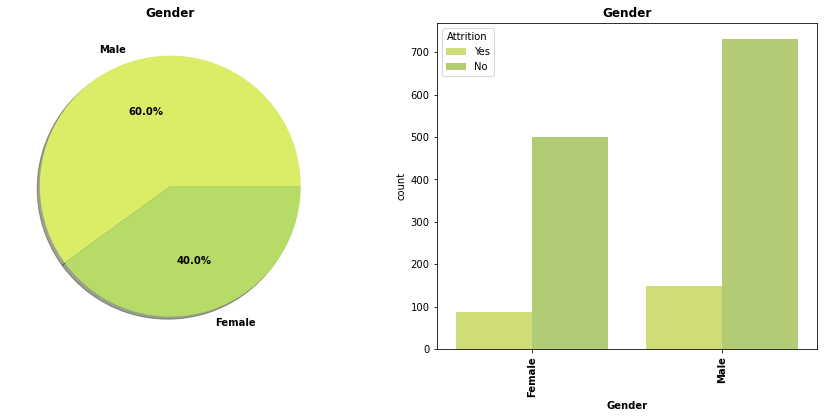

Observations for feature GENDER:


Value  Count  % Count
0    Male    882     60.0
1  Female    588     40.0

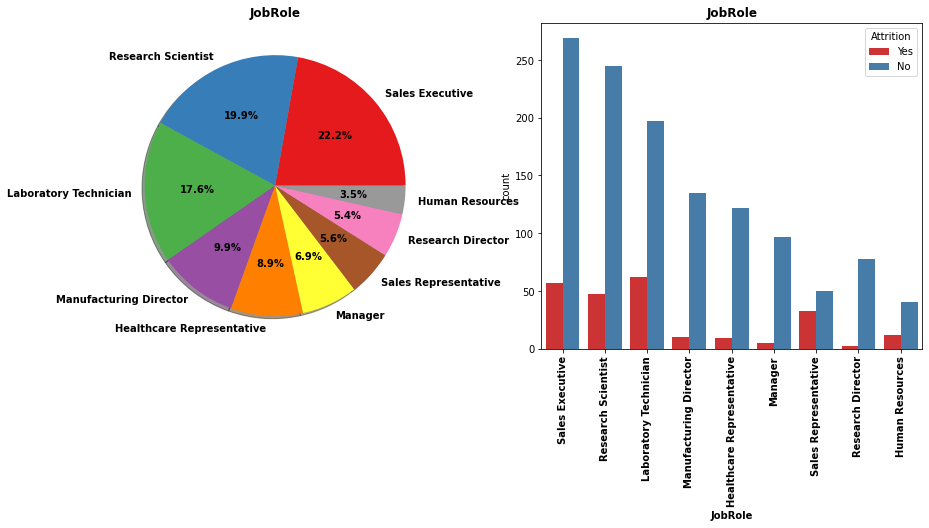

Observations for feature JOBROLE:


Value  Count  % Count
0            Sales Executive    326     22.2
1         Research Scientist    292     19.9
2      Laboratory Technician    259     17.6
3     Manufacturing Director    145      9.9
4  Healthcare Representative    131      8.9
5                    Manager    102      6.9
6       Sales Representative     83      5.6
7          Research Director     80      5.4
8            Human Resources     52      3.5

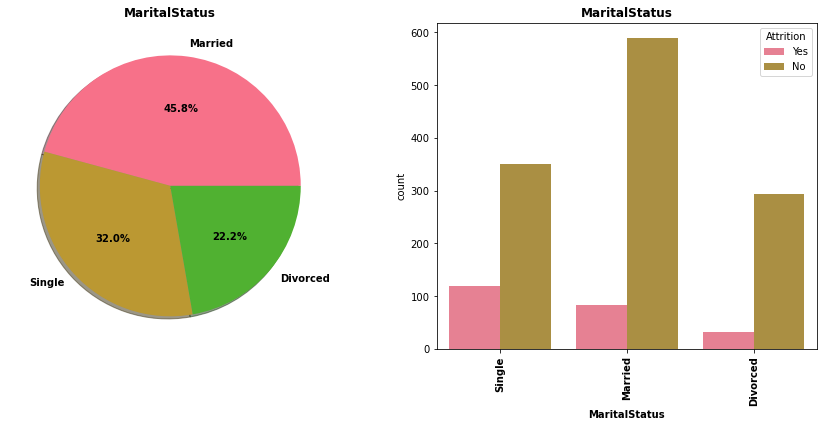

Observations for feature MARITALSTATUS:


Value  Count  % Count
0   Married    673     45.8
1    Single    470     32.0
2  Divorced    327     22.2

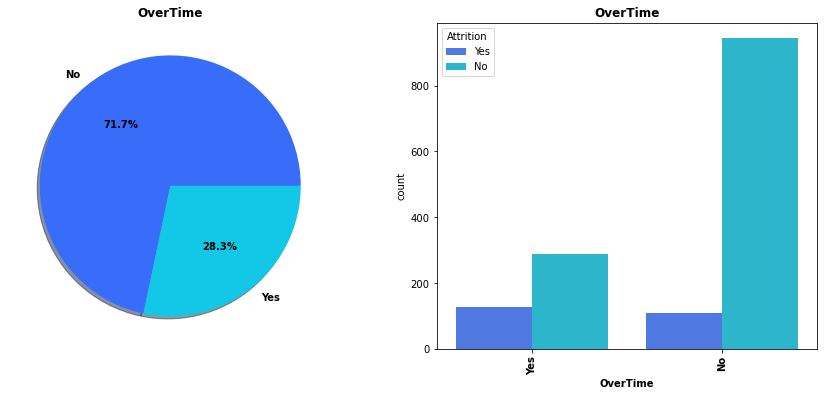

Observations for feature OVERTIME:


Value  Count  % Count
0    No   1054     71.7
1   Yes    416     28.3

In [212]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket','mako','flare','Blues_r','Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap','Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges','PRGn',
        'Paired', 'Pastel1', 'Pastel2', 'PiYG','PuBu', 'PuOr', 'PuRd', 'Purples', 'RdBu','RdGy', 'RdPu', 'RdYlBu', 'RdYlGn',
        'Reds', 'Set1','Set2', 'Set3', 'Spectral', 'Wistia', 'YlGn','YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary','bone',
        'brg', 'bwr', 'cividis', 'cool', 'coolwarm','copper', 'cubehelix', 'flag', 'gist_earth','gist_gray', 'gist_heat', 
        'gist_ncar', 'gist_rainbow','gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray','hot', 'hsv', 'icefire', 
        'inferno', 'jet', 'magma','mako', 'nipy_spectral', 'ocean', 'pink', 'plasma','prism', 'rainbow', 'rocket', 
        'seismic', 'spring','summer', 'tab10', 'tab20','terrain', 'turbo', 'twilight','viridis', 'vlag', 'winter']

plotnumber =1
for i in df_cat_str[1:]:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=20:
        f,ax=plt.subplots(1,2,figsize=(15,6))
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                                      textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
        ax[0].set_title(i, fontsize=12,fontweight ='bold')
        ax[0].set_ylabel('')
        sns.countplot(df[i],hue=df["Attrition"],data=df,ax=ax[1])
        ax[1].set_title(i,fontsize=12,fontweight ='bold')
        ax[1].set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    print('\033[1m'+ "Observations for feature " + i.upper() + ":" +'\033[0m')   
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts()).iloc[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

### Univariate Graphical Analysis for Categorical data - Int Data Type

In [33]:
df_int_cat=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [34]:
len(df_int_cat)

9

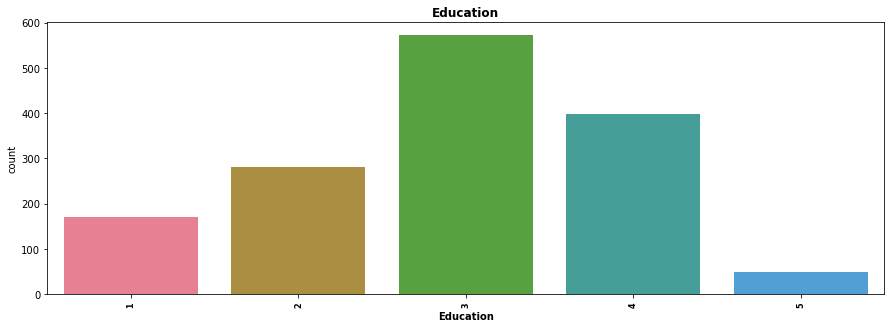

Observations for feature EDUCATION:


Value  Count  % Count
0      3    572     38.9
1      4    398     27.1
2      2    282     19.2
3      1    170     11.6
4      5     48      3.3

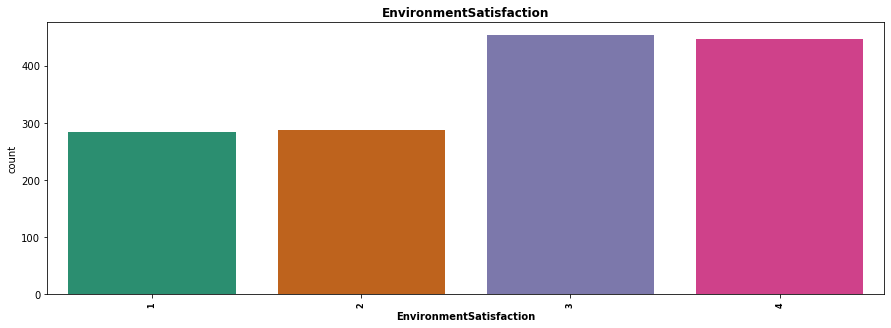

Observations for feature ENVIRONMENTSATISFACTION:


Value  Count  % Count
0      3    453     30.8
1      4    446     30.3
2      2    287     19.5
3      1    284     19.3

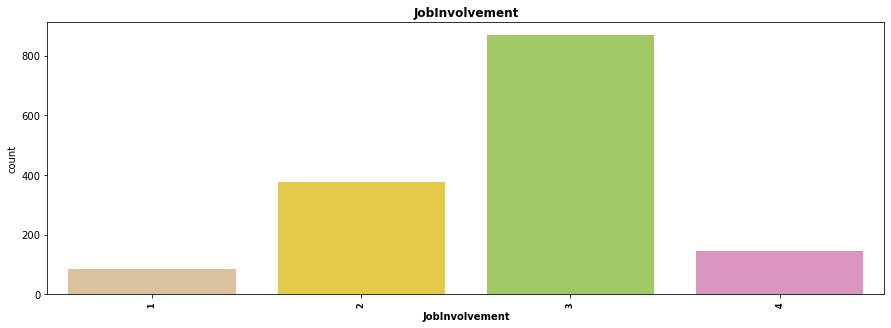

Observations for feature JOBINVOLVEMENT:


Value  Count  % Count
0      3    868     59.0
1      2    375     25.5
2      4    144      9.8
3      1     83      5.6

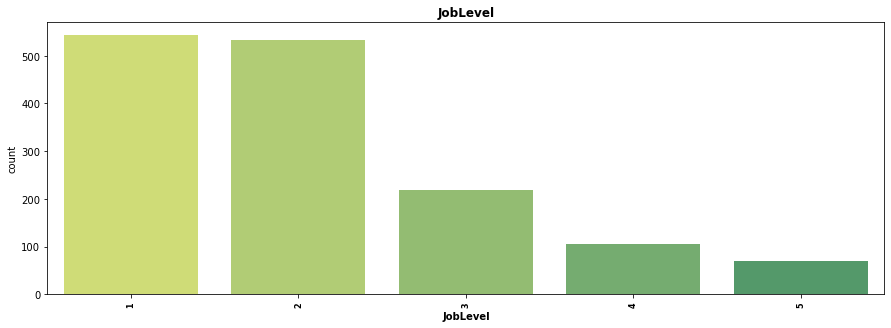

Observations for feature JOBLEVEL:


Value  Count  % Count
0      1    543     36.9
1      2    534     36.3
2      3    218     14.8
3      4    106      7.2
4      5     69      4.7

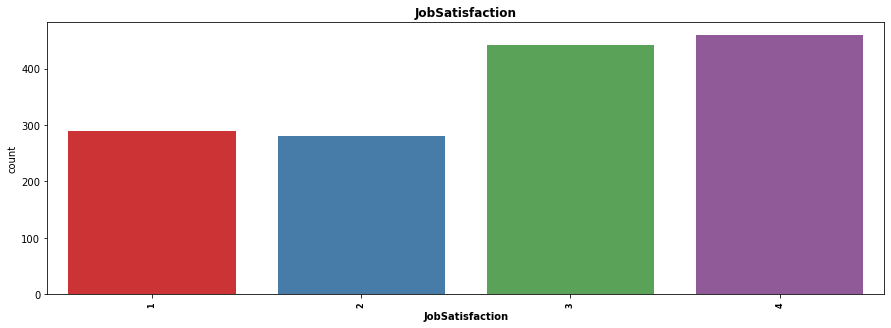

Observations for feature JOBSATISFACTION:


Value  Count  % Count
0      4    459     31.2
1      3    442     30.1
2      1    289     19.7
3      2    280     19.0

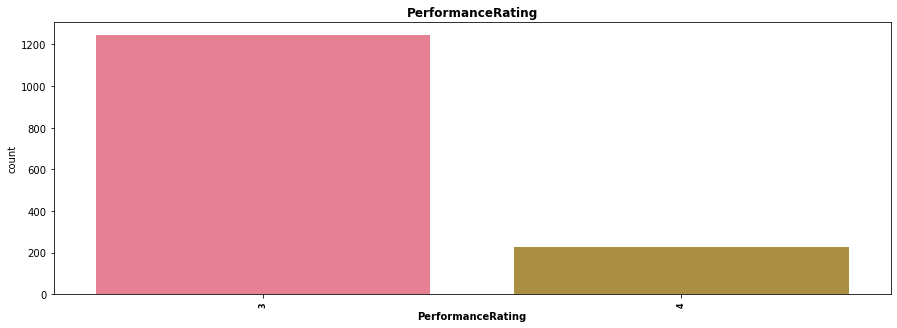

Observations for feature PERFORMANCERATING:


Value  Count  % Count
0      3   1244     84.6
1      4    226     15.4

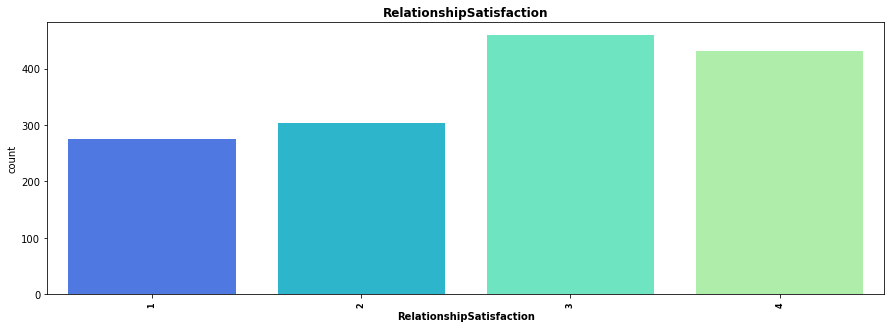

Observations for feature RELATIONSHIPSATISFACTION:


Value  Count  % Count
0      3    459     31.2
1      4    432     29.4
2      2    303     20.6
3      1    276     18.8

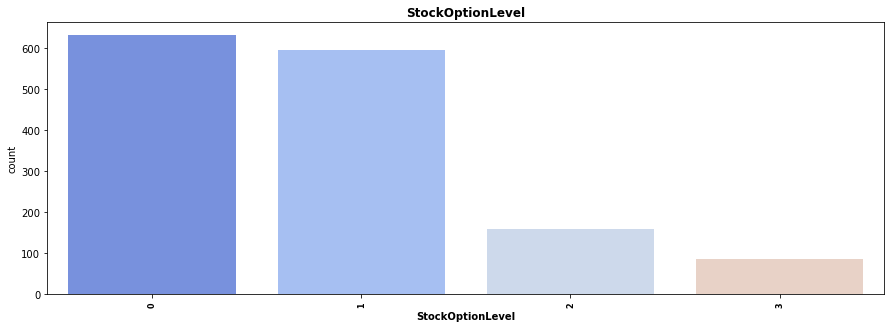

Observations for feature STOCKOPTIONLEVEL:


Value  Count  % Count
0      0    631     42.9
1      1    596     40.5
2      2    158     10.7
3      3     85      5.8

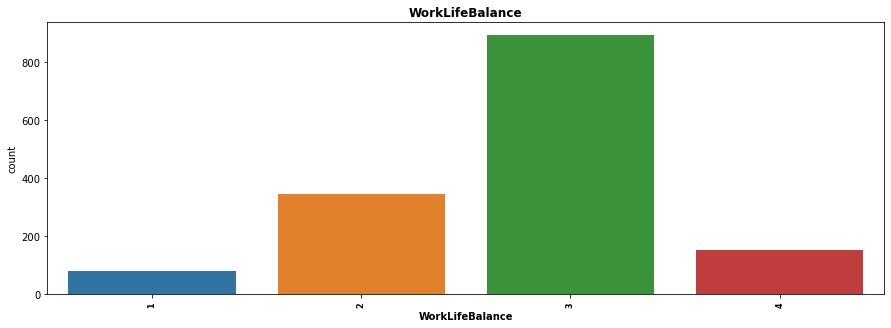

Observations for feature WORKLIFEBALANCE:


Value  Count  % Count
0      3    893     60.7
1      2    344     23.4
2      4    153     10.4
3      1     80      5.4

In [35]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket','mako','flare','Blues_r','Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap','Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges','PRGn',
        'Paired', 'Pastel1', 'Pastel2', 'PiYG','PuBu', 'PuOr', 'PuRd', 'Purples', 'RdBu','RdGy', 'RdPu', 'RdYlBu', 'RdYlGn',
        'Reds', 'Set1','Set2', 'Set3', 'Spectral', 'Wistia', 'YlGn','YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary','bone',
        'brg', 'bwr', 'cividis', 'cool', 'coolwarm','copper', 'cubehelix', 'flag', 'gist_earth','gist_gray', 'gist_heat', 
        'gist_ncar', 'gist_rainbow','gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray','hot', 'hsv', 'icefire', 
        'inferno', 'jet', 'magma','mako', 'nipy_spectral', 'ocean', 'pink', 'plasma','prism', 'rainbow', 'rocket', 
        'seismic', 'spring','summer', 'tab10', 'tab20','terrain', 'turbo', 'twilight','viridis', 'vlag', 'winter']

plotnumber =1
for i in df_int_cat:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=20:
        f,ax=plt.subplots(1,1,figsize=(15,5))
        sns.countplot(df[i],data=df)
        ax.set_title(i,fontsize=12,fontweight ='bold')
        ax.set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=8,fontweight ='bold',rotation=90)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    print('\033[1m'+ "Observations for feature " + i.upper() + ":" +'\033[0m')   
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts()).iloc[j])
        percent_value_count.append(round(((df[i].value_counts()).iloc[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

### Univariate Graphical Analysis for Numerical data

In [36]:
len(df_numerical.columns)

14

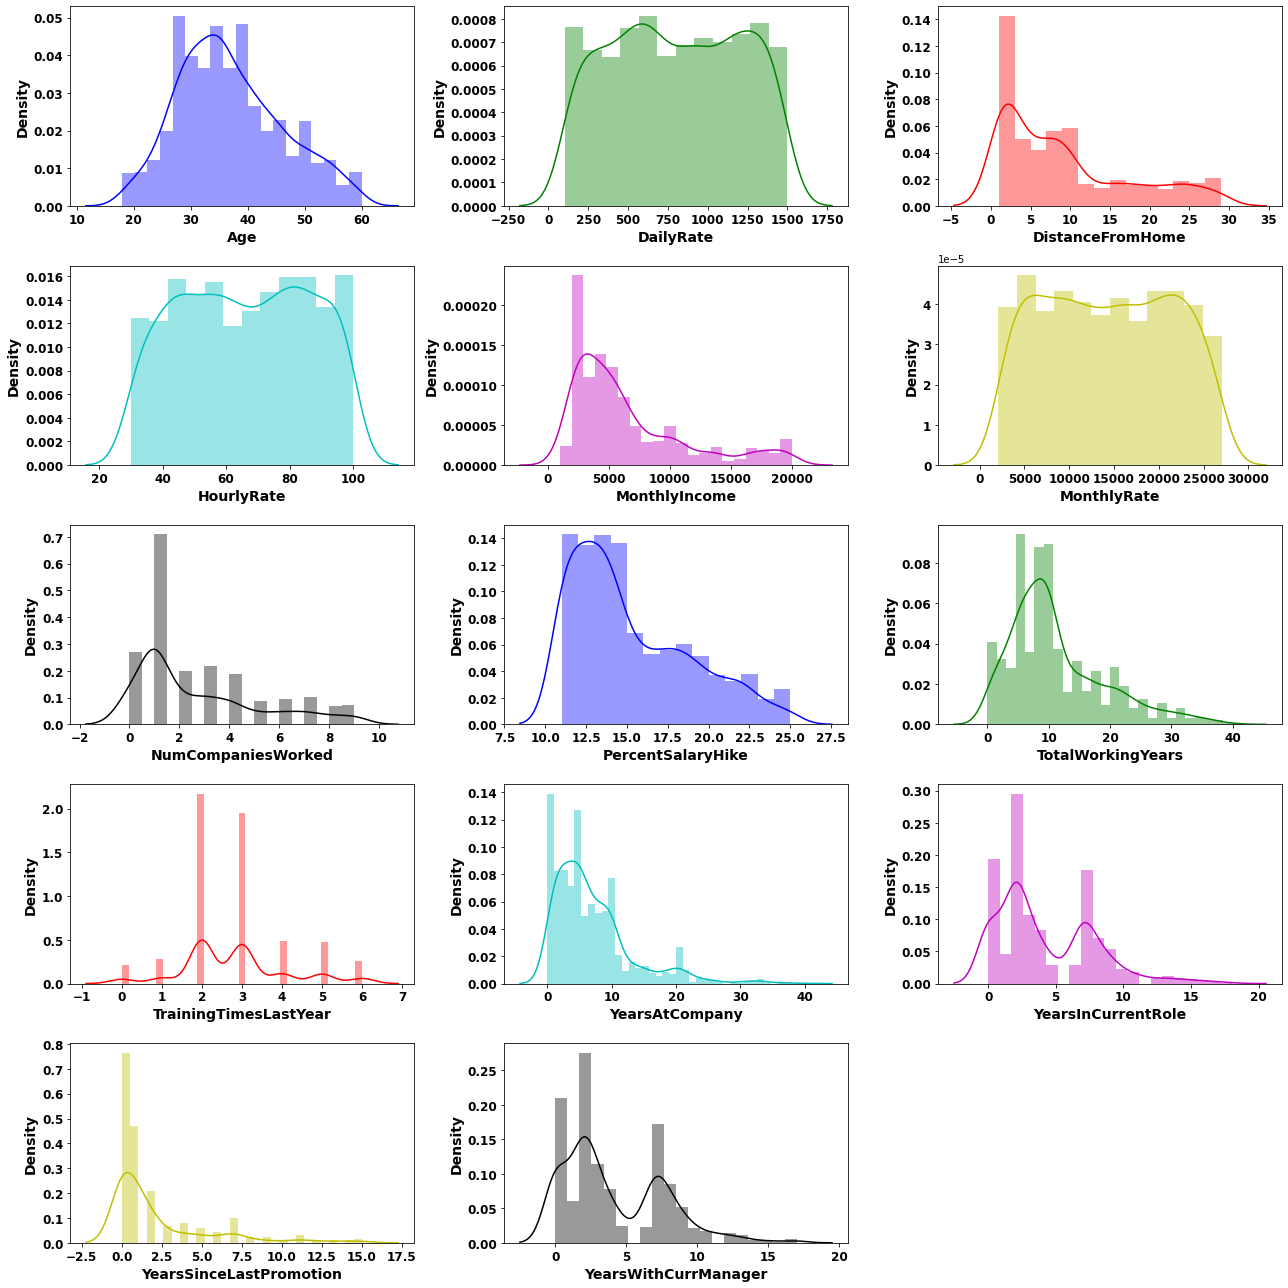

In [37]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,3,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **Distribution is not normal in all features**
- **Many features are having right skewed data**
- **Data spread is large in all features**

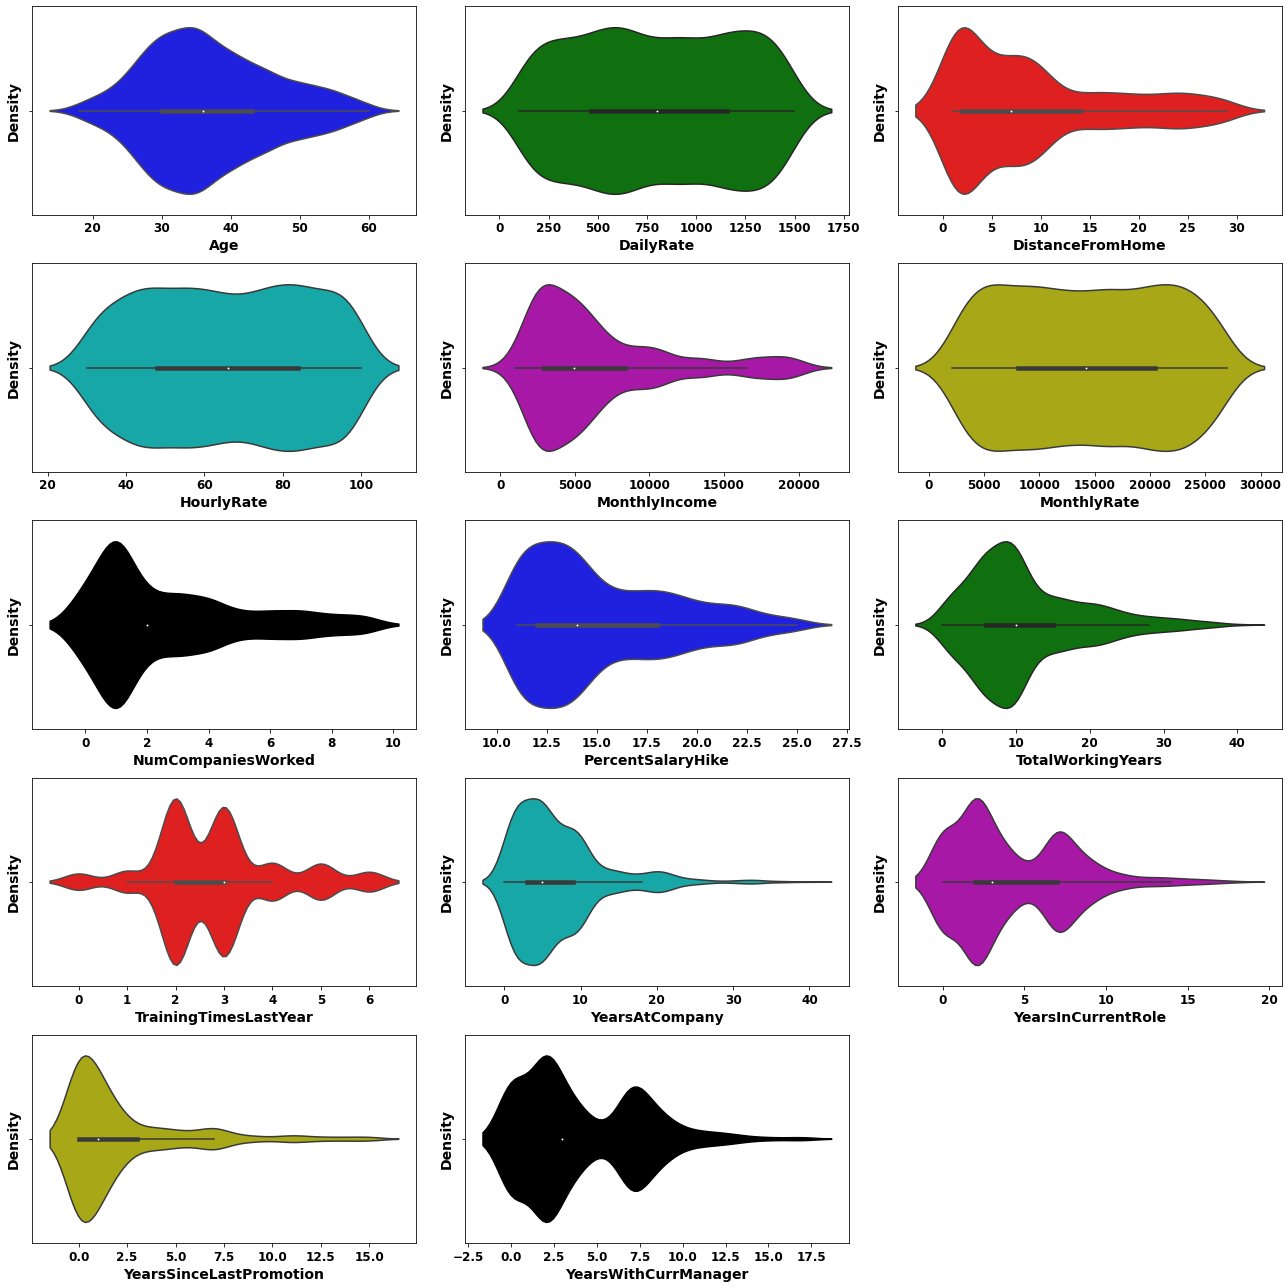

In [38]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,3,plotnum)
        sns.violinplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **Majority of people have spent 3 to 10 years at company.**
- **Most of people staying company upto 2 years after promotion.**
- **Majority of people were trained 2-3 times in last year.If employees leaves job then it is loss investment for company.**
- **Majority of people stay in same role for maximum 4 yrs.**
- **Majority of Employees have salary hike of 10 to 15%.**

### Bivariate Graphical Analysis for Categorical data - Int Data Type

In [39]:
len(df_int_cat)

9

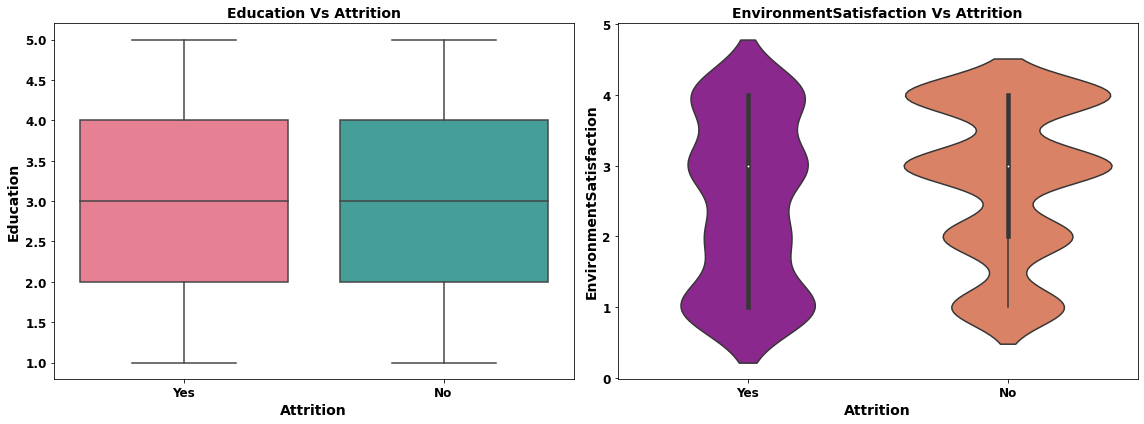

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_int_cat[0]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_int_cat[0]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_int_cat[1]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_int_cat[1]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[1], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Majority of the attrition is with education level between 2 to 4 and interestingly, no attrition with the same education level people**
- **Employees with higher environment satistifaction are not leaving the company while employees with lower environment satisfication leaving the company**

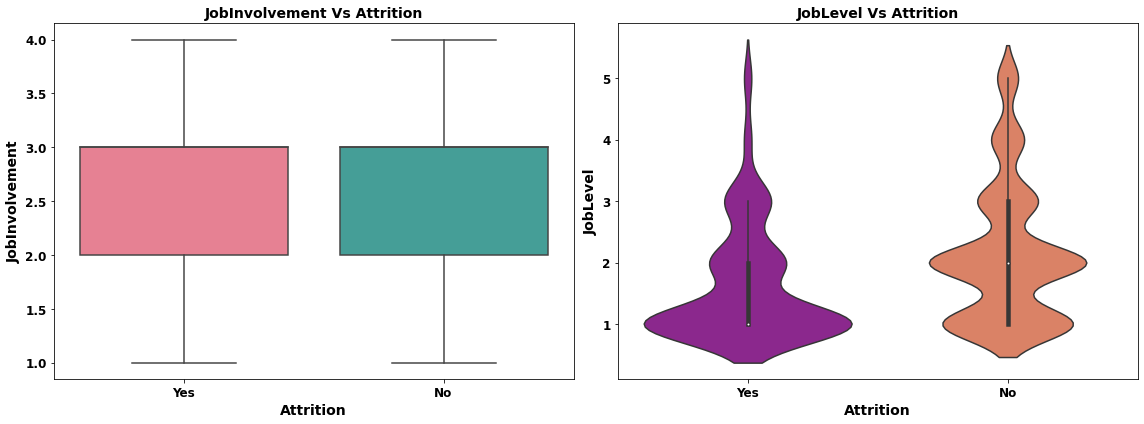

In [41]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_int_cat[2]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_int_cat[2]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[2], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_int_cat[3]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_int_cat[3]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[3], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Interestingly, job involvement is medium to high for both employees category with and without attrition, that means job involvement has no siginificant impact on the attrition**
- **Employees at lower job level are leaving company more while employees at lower job levels are not leaving the company. Employees at higher job levels has less attrition**

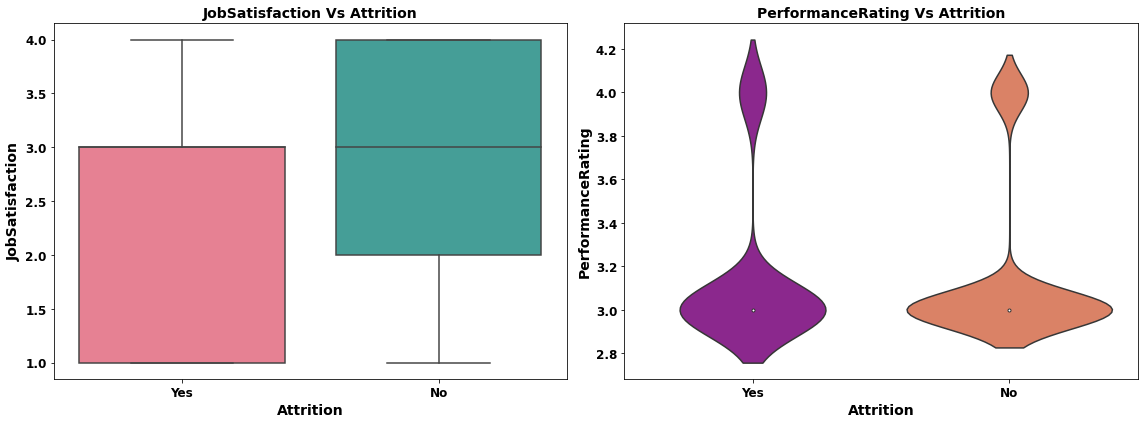

In [42]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_int_cat[4]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_int_cat[4]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[4], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_int_cat[5]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_int_cat[5]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[5], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Attrition is high with low job satisfication employees and less with high job satisfication employees**
- **Most of the employees are getting performance rating of 3 in both attrition categories however there is large population of employees in the group of no attrition with same performance rating**

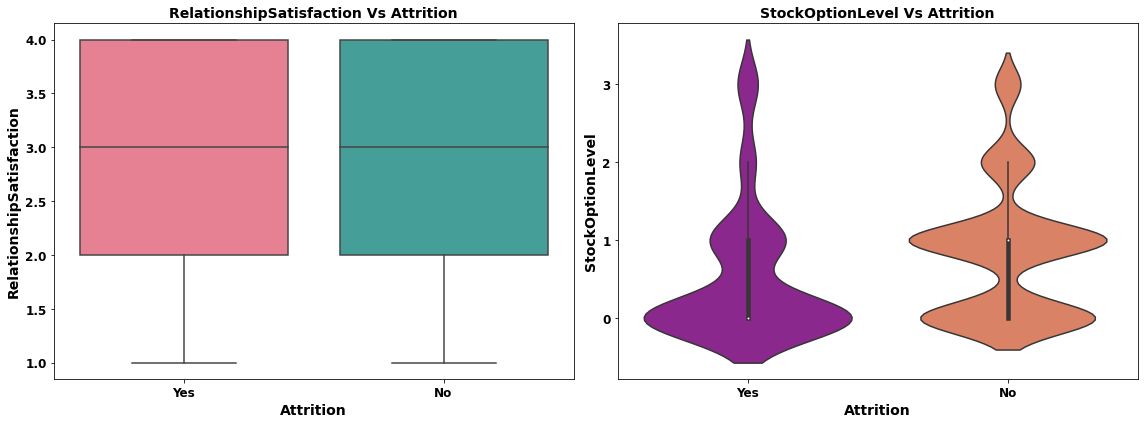

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_int_cat[6]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_int_cat[6]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[6], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_int_cat[7]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_int_cat[7]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[7], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Relationship satisfication has no significant impact on attrition**

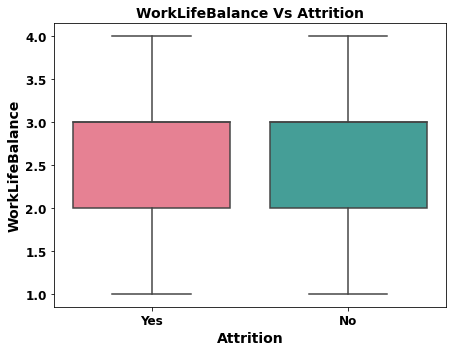

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_int_cat[8]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_int_cat[8]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[8], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Interestingly, worklifebalance has no significant impact on the attrition however need to study more variables on this**

### Bivariate Graphical Analysis for Numerical data

In [45]:
df_numerical.shape

(1470, 14)

In [46]:
df_num=df_numerical.columns
df_num

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

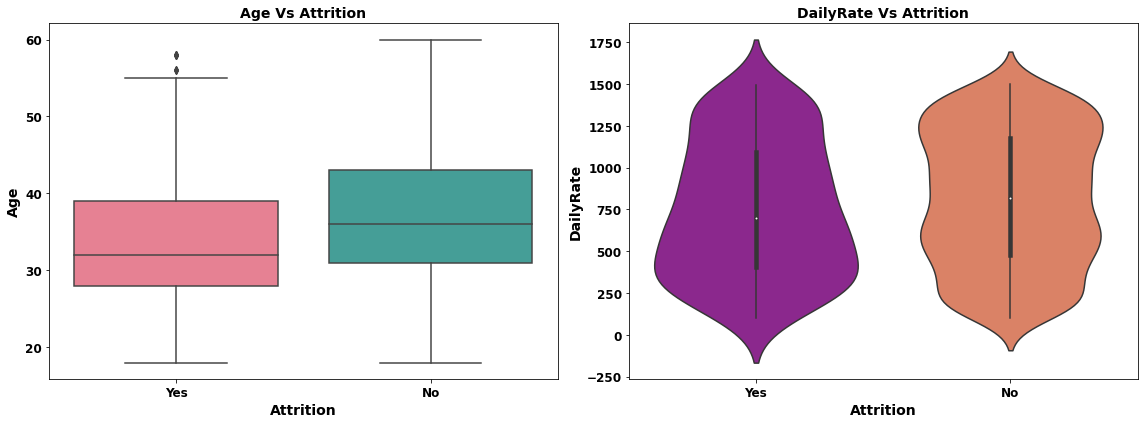

In [47]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_num[0]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_num[0]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_num[1]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_num[1]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[1], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Lower age employees are leaving the organization more compared to higher age employees**
- **Daily rate is less for the employees who are leaving the organization while it is higher for the employees stays in the organization**

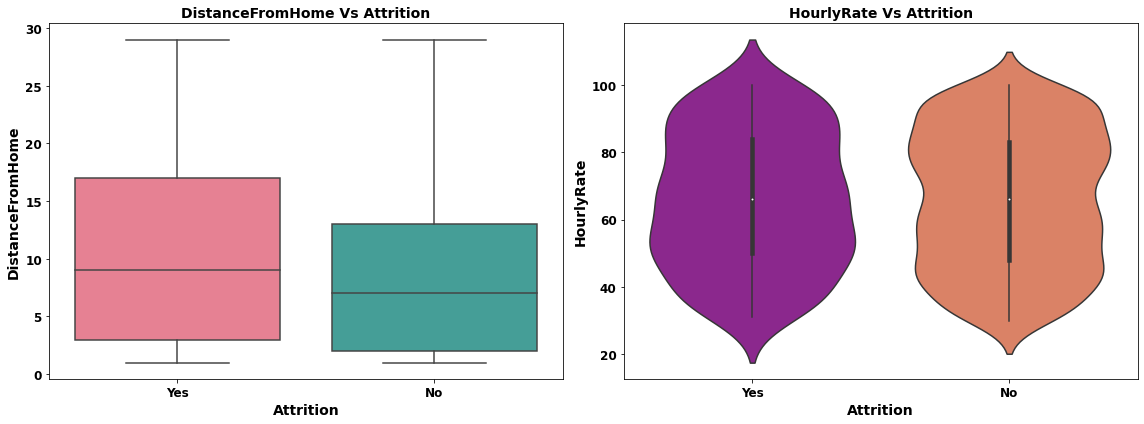

In [48]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_num[2]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_num[2]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[2], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_num[3]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_num[3]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[3], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Attrition is higher for the employees who are travelling more from their home to the office hence work from home option shall work in this case**
- **Hourly rate is less for the employees who are leaving the organization while it is higher for the employees stays in the organization**

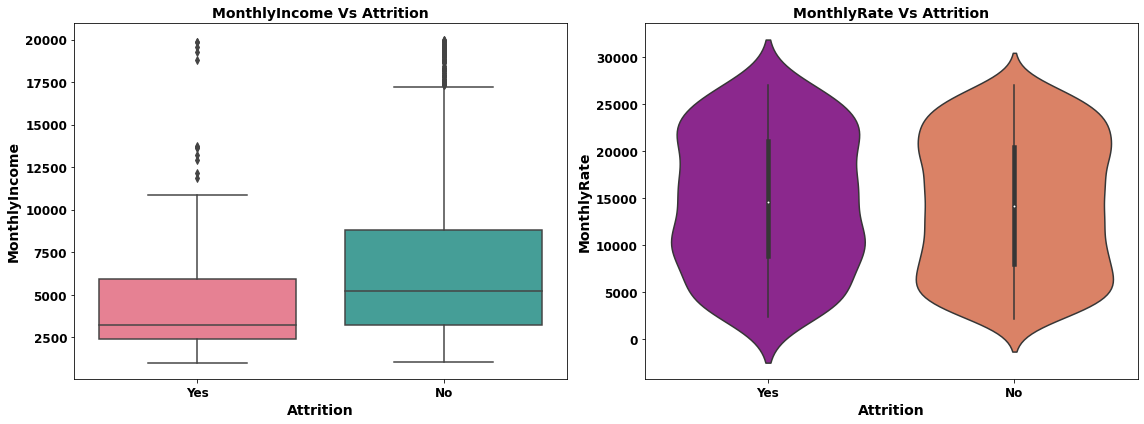

In [49]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_num[4]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_num[4]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[4], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_num[5]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_num[5]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[5], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Attrition is higher for the employees who are getting lower monthly income**
- **Monthly rate is less for the employees who are leaving the organization while it is higher for the employees stays in the organization**

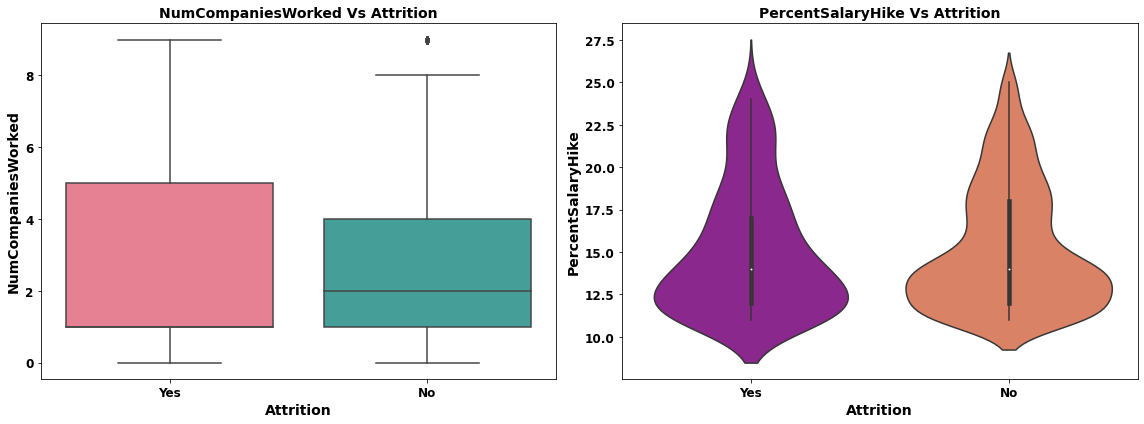

In [50]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_num[6]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_num[6]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[6], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_num[7]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_num[7]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[7], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Attrition is higher for the employees who are frequently changing the companies**

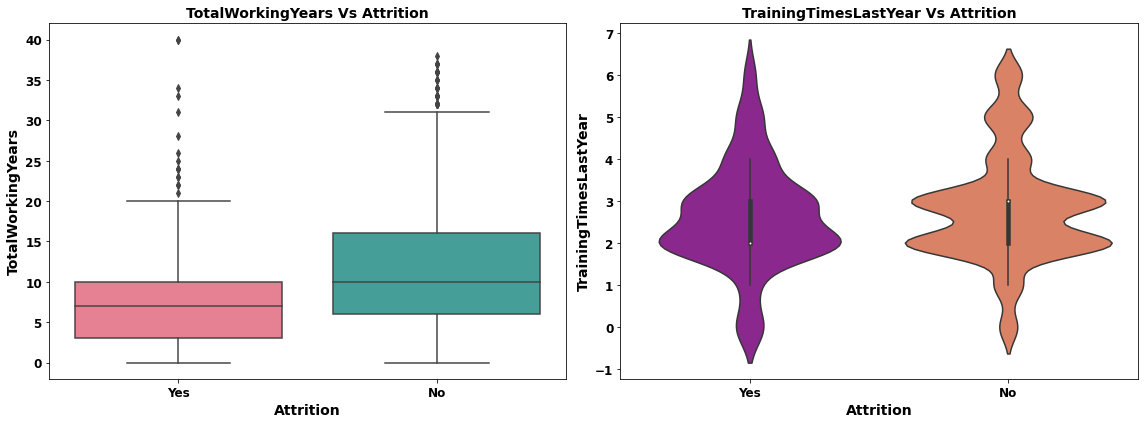

In [51]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_num[8]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_num[8]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[8], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_num[9]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_num[9]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[9], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Empoyees with lower working experience are leaving the organization with experienced employees**
- **No. of trainings are low for employees with attrition**

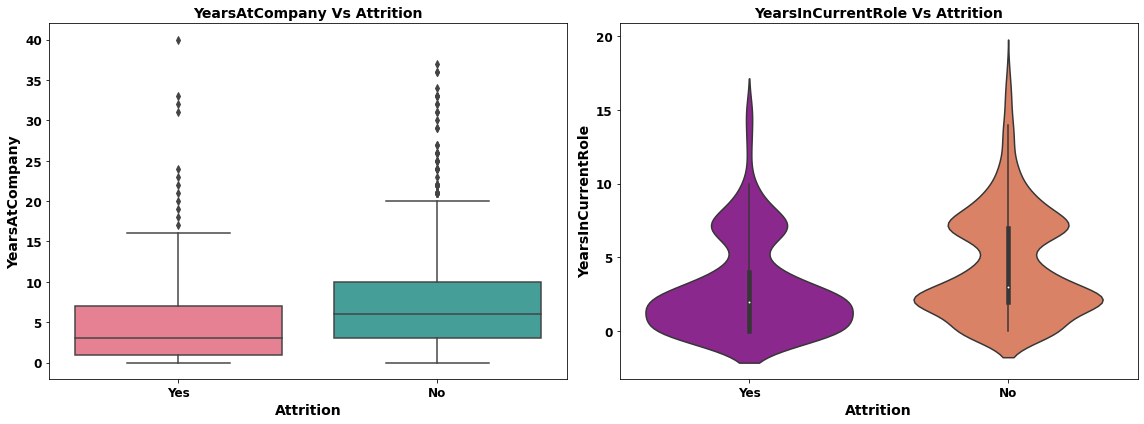

In [52]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_num[10]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_num[10]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[10], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_num[11]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_num[11]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[11], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Empoyees with lower working experience are leaving the organization with experienced employees**

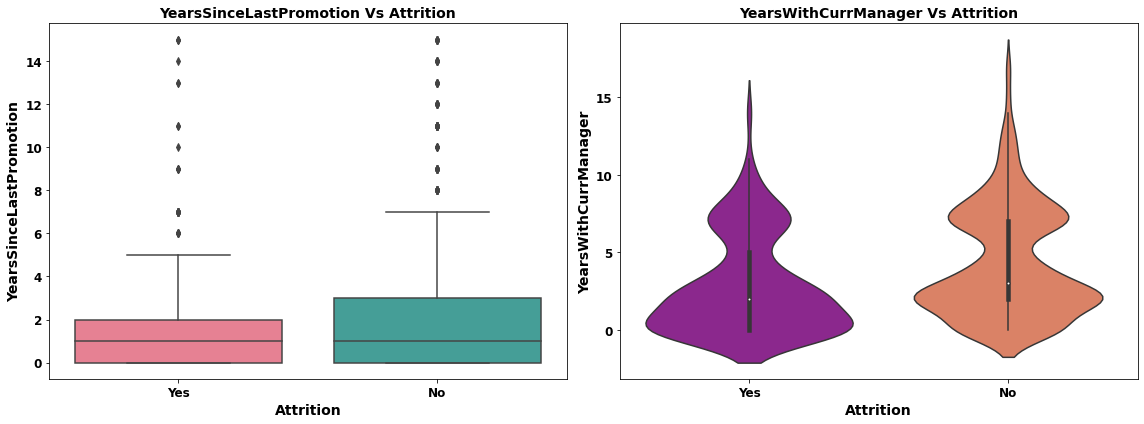

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Attrition'],df[df_num[12]], palette = 'husl')
plt.title('{} Vs Attrition'.format(df_num[12]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[12], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Attrition'],df[df_num[13]], palette = 'plasma')
plt.title('{} Vs Attrition'.format(df_num[13]),fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=14,fontweight='bold')
plt.ylabel(df_num[13], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations

- **Empoyees who are taking longer time to get promoted are leaving the organization**
- **Interestingly, attrition is high with employees who have managers changing frequently, this could be due to no proper concentration by frequently changed managers on employees career growth**

### Multivariate Graphical Analysis

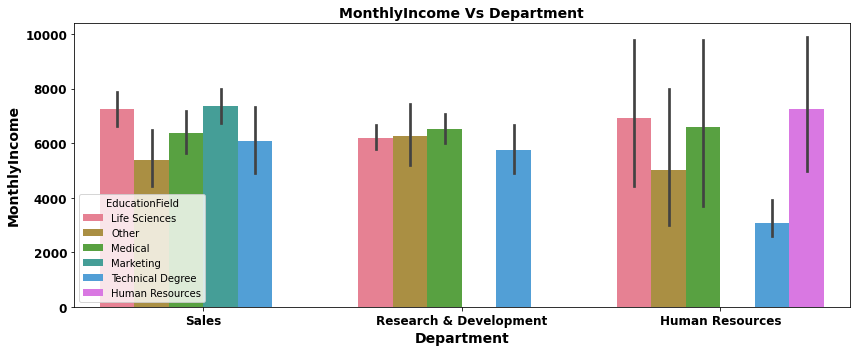

In [54]:
plt.figure(figsize=(12,5))
sns.barplot(x='Department',y='MonthlyIncome',data=df,hue='EducationField', palette='husl')
plt.title("MonthlyIncome Vs Department",fontsize=14, fontweight='bold')
plt.xlabel("Department", fontsize=14,fontweight='bold')
plt.ylabel("MonthlyIncome", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:

- **In Sales department, employees belonging to Life Sciences and Marketing field get more salary**
- **In Research & Development department, employees belonging to Medical field get more salary**
- **In Human Resources department, employees belonging to human resources field get more salary**

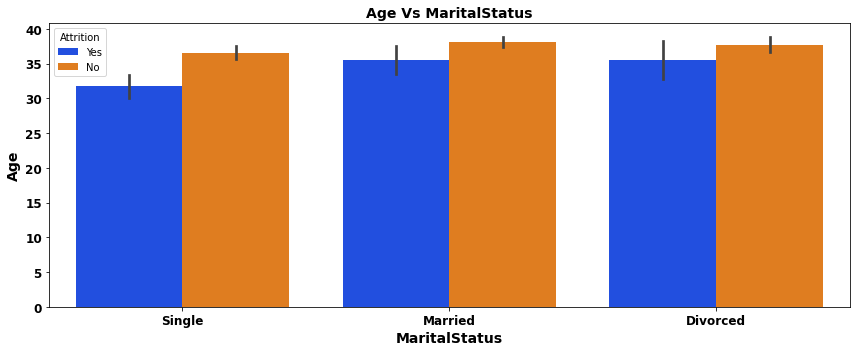

In [214]:
plt.figure(figsize=(12,5))
sns.barplot(x='MaritalStatus',y='Age',data=df,hue='Attrition', palette='bright')
plt.title("Age Vs MaritalStatus",fontsize=14, fontweight='bold')
plt.xlabel("MaritalStatus", fontsize=14,fontweight='bold')
plt.ylabel("Age", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:

- **For both married and divorced status employees, based on their age, the Attrition rate is high**

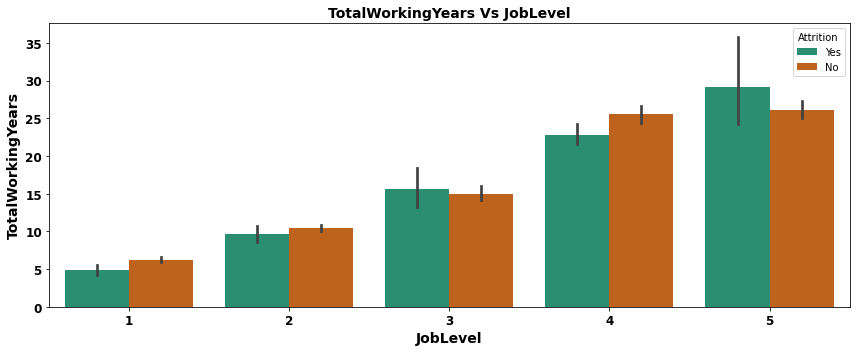

In [56]:
plt.figure(figsize=(12,5))
sns.barplot(x='JobLevel',y='TotalWorkingYears',data=df,hue='Attrition', palette='Dark2')
plt.title("TotalWorkingYears Vs JobLevel",fontsize=14, fontweight='bold')
plt.xlabel("JobLevel", fontsize=14,fontweight='bold')
plt.ylabel("TotalWorkingYears", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:

- **We can see that the working year and job level increases, as the Attrition rate increases**

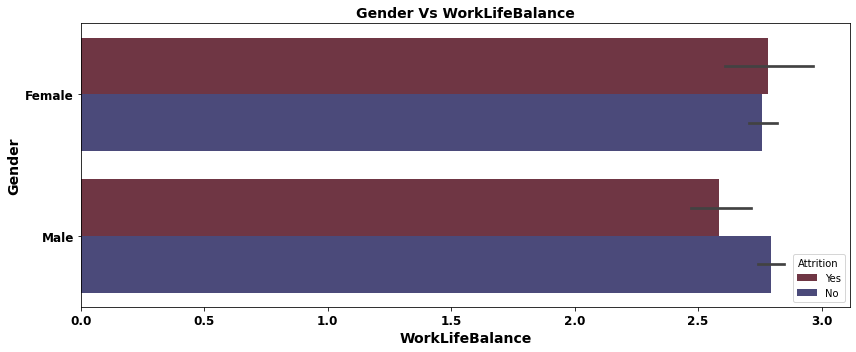

In [57]:
plt.figure(figsize=(12,5))
sns.barplot(x='WorkLifeBalance',y='Gender',data=df,hue='Attrition', palette='icefire_r')
plt.title("Gender Vs WorkLifeBalance",fontsize=14, fontweight='bold')
plt.xlabel("WorkLifeBalance", fontsize=14,fontweight='bold')
plt.ylabel("Gender", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:

- **If we observe the worklife balance on the basis of Gender,Female employees are having more Attrition Rate than male.**

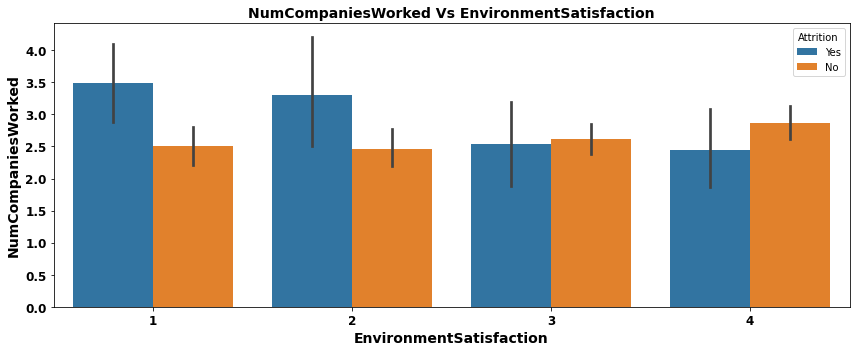

In [58]:
plt.figure(figsize=(12,5))
sns.barplot(x='EnvironmentSatisfaction',y='NumCompaniesWorked',data=df,hue='Attrition', palette='tab10')
plt.title("NumCompaniesWorked Vs EnvironmentSatisfaction",fontsize=14, fontweight='bold')
plt.xlabel("EnvironmentSatisfaction", fontsize=14,fontweight='bold')
plt.ylabel("NumCompaniesWorked", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:

- **Environment satisfaction is also playing a role For Attrition rate because we can observe that if environment satisfaction is more for certain employees, there are more attritions present. If it is less, then there is no Attrition rate.**

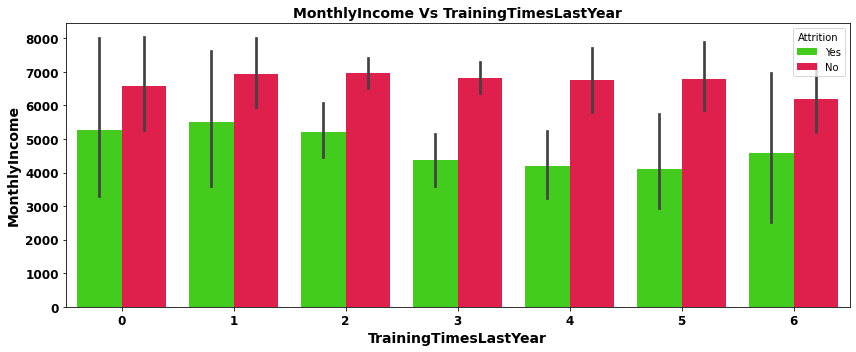

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(x='TrainingTimesLastYear',y='MonthlyIncome',data=df,hue='Attrition', palette='prism')
plt.title("MonthlyIncome Vs TrainingTimesLastYear",fontsize=14, fontweight='bold')
plt.xlabel("TrainingTimesLastYear", fontsize=14,fontweight='bold')
plt.ylabel("MonthlyIncome", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:

- **Based on TrainingTimesLastYear vs MonthlyIncome, the less Attrition rate goes high as income increases. For more trainings, the income increases and decreases sometimes.**

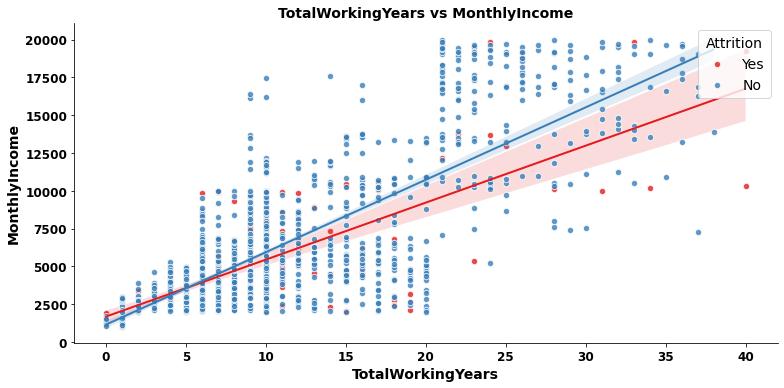

In [60]:
sns.lmplot(x="TotalWorkingYears",y="MonthlyIncome",hue="Attrition",data= df, height=5.5, aspect=2,line_kws={'linewidth':2},palette = 'Set1',scatter_kws={"s": 40,'edgecolor':'w'},legend=False)
plt.title('TotalWorkingYears vs MonthlyIncome',fontsize=14,fontweight ='bold')
plt.xlabel('TotalWorkingYears', fontsize=14,fontweight='bold')
plt.ylabel('MonthlyIncome', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(title='Attrition', fontsize='14', title_fontsize='14',loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations:

- **Monthly income increases with increase in working experience**

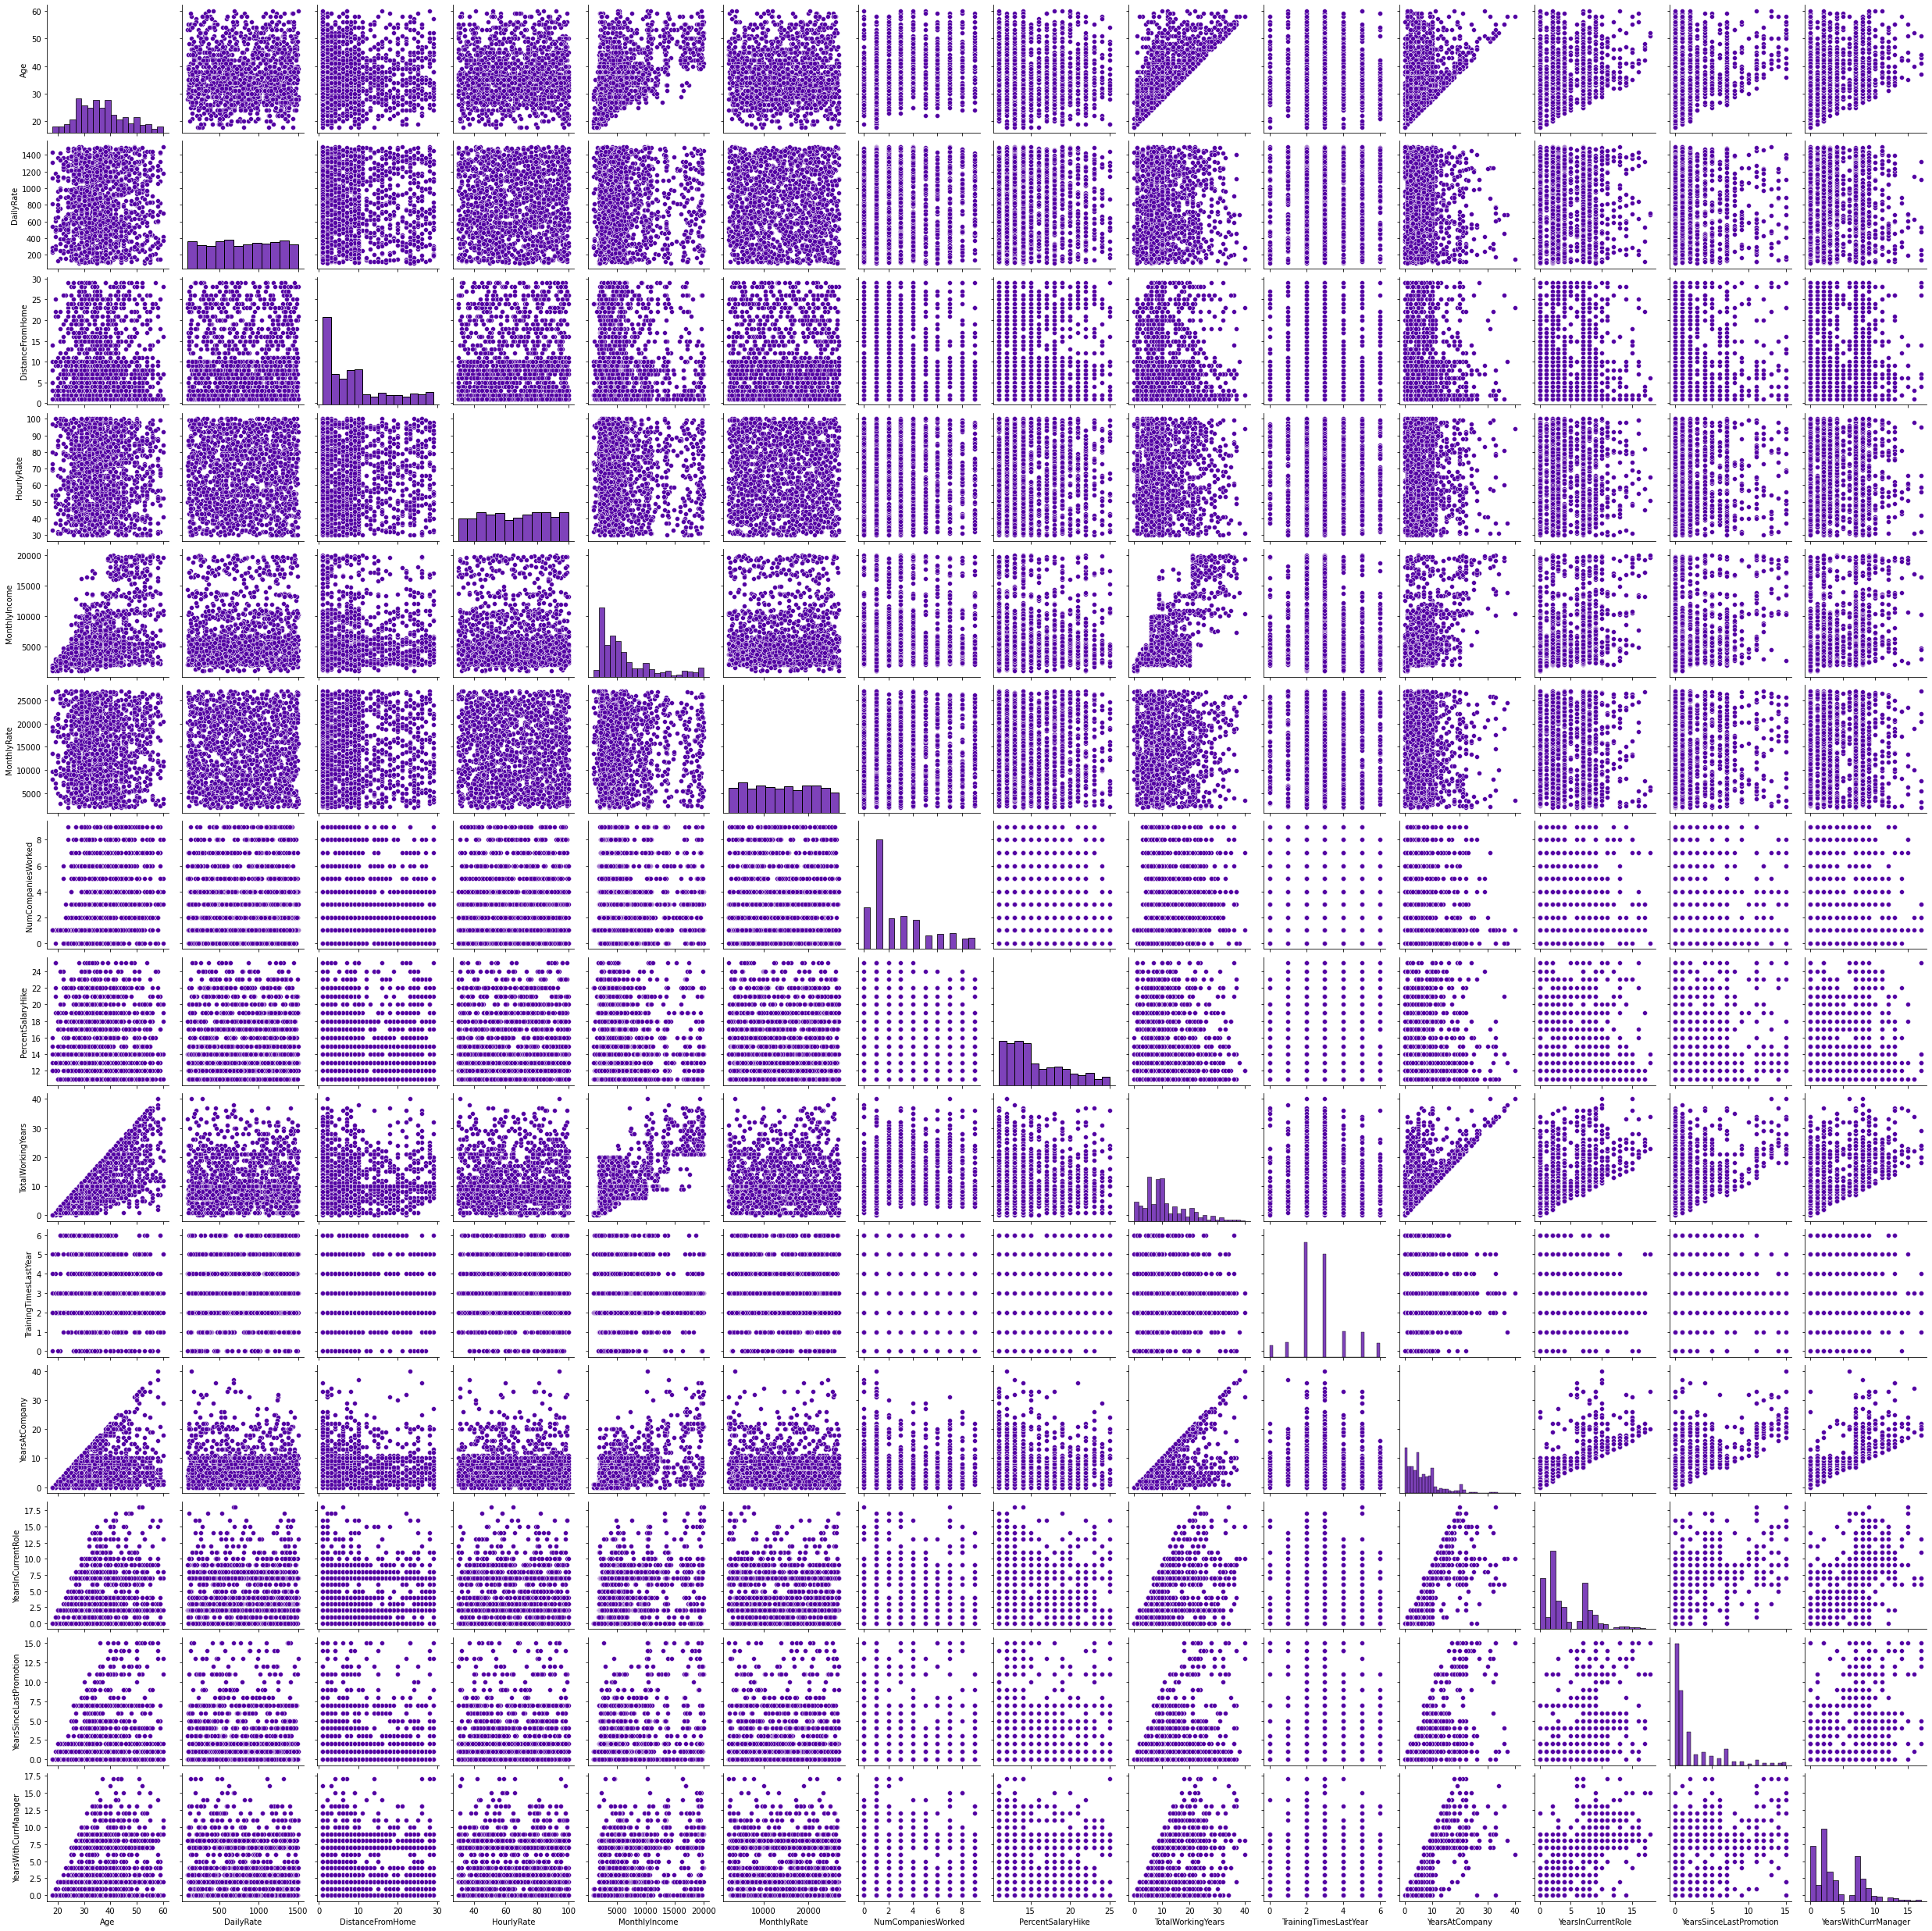

In [61]:
sns.pairplot(df_numerical)

# Encoding of categorical features:

Using Ordinal Encoder to encode the data

In [62]:
# Encoding needed for columns with string data to change string data to numerical format
df_encode=df[df_cat_str].copy()
df_encode.head(3)

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes

In [63]:
# Using Ordinal Encoder on categorical variable
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df_encode.columns:
    df[i] = enc.fit_transform(df_encode[i].values.reshape(-1,1))
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41        1.0             2.0       1102         2.0                 1   
1   49        0.0             1.0        279         1.0                 8   
2   37        1.0             2.0       1373         1.0                 2   
3   33        0.0             1.0       1392         1.0                 3   
4   27        0.0             2.0        591         1.0                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2             1.0                        2     0.0          94   
1          1             1.0                        3     1.0          61   
2          2             4.0                        4     1.0          92   
3          4             1.0                        4     0.0          56   
4          1             3.0                        1     1.0          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2      7.0                4            2.0   
1               2         2      6.0                2            1.0   
2               2         1      2.0                3            2.0   
3               3         1      6.0                3            1.0   
4               3         1      2.0                2            1.0   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8       1.0   
1           5130        24907                   1       0.0   
2           2090         2396                   6       1.0   
3           2909        23159                   1       1.0   
4           3468        16632                   9       0.0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

# Checking coefficients of correlation (r)

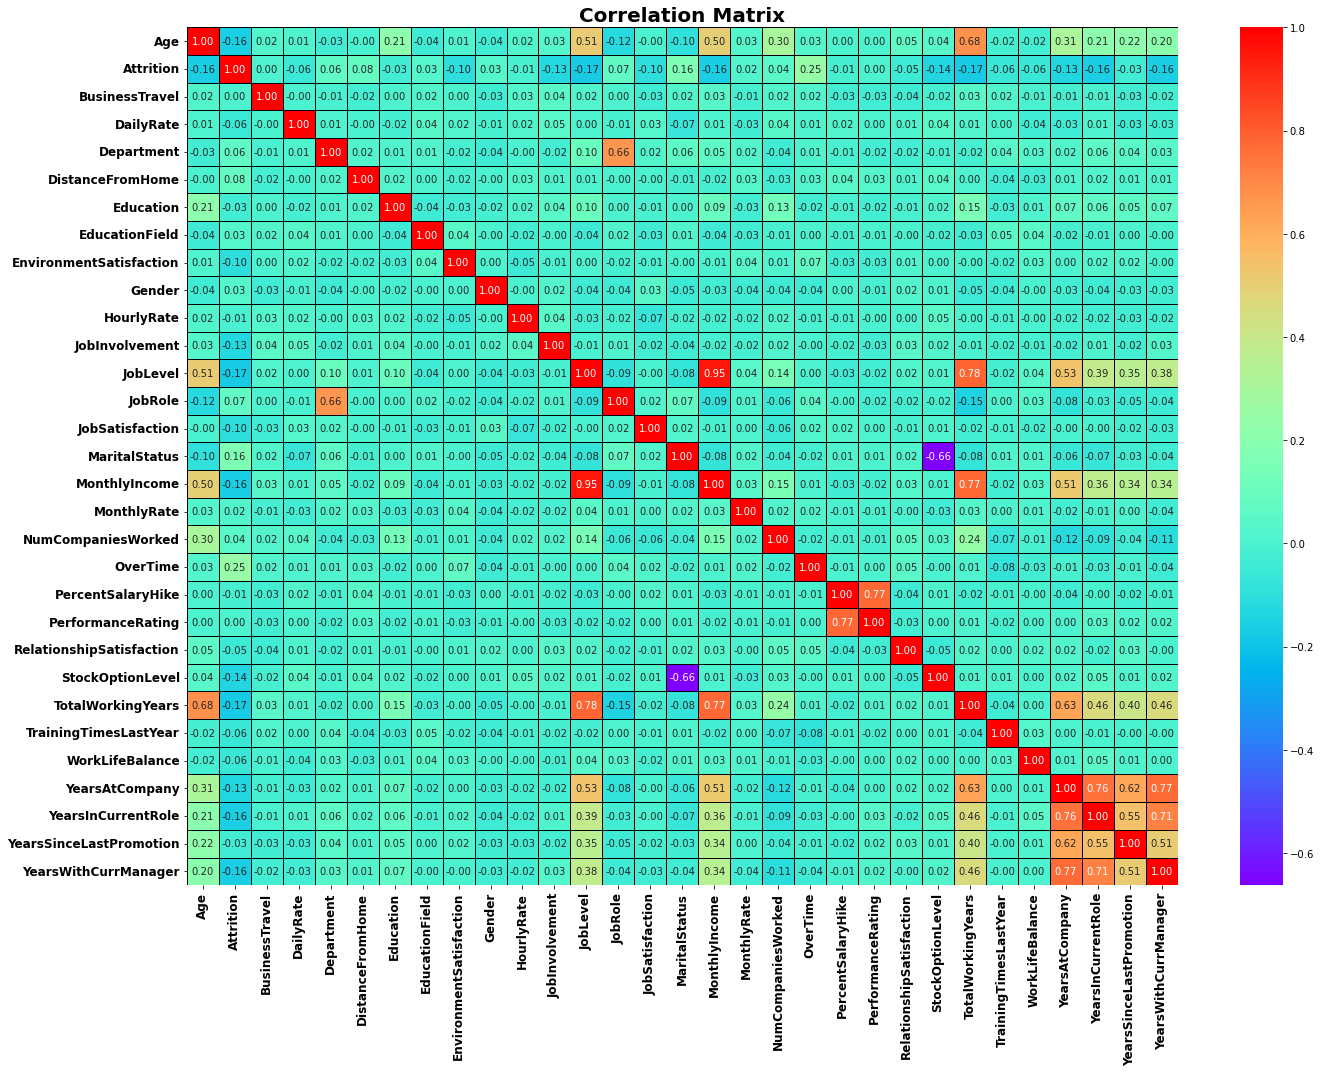

In [64]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg")
plt.show()

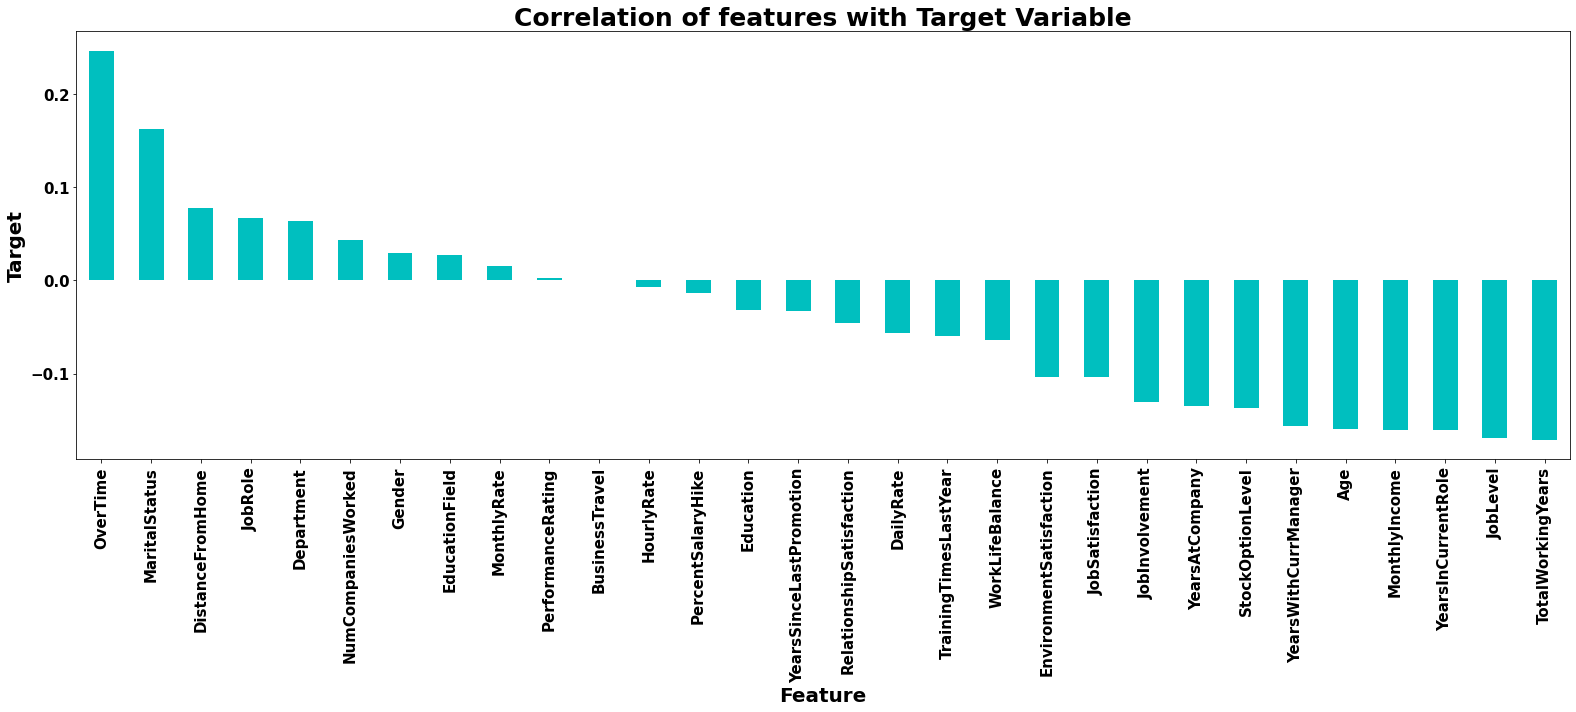

In [65]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [66]:
corr_r["Attrition"].sort_values(ascending=False) 

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

#### Observations for target variable:
- **There are multiple features with weak and very weak corrleations**
- **Max +ve correlation: 'OverTime'** 
- **Max -ve correlation: 'TotalWorkingYears'**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation**
- **Considering -0.01 to 0.01 range as very weak correlation with target variable. Idenfied features within this range are "BusinessTravel","HourlyRate" and "PerformanceRating"**
- **I will check feature scores from SelectKBest algorithm with ANOVA F-value and also will check using Feature Importance with ExtraTreeClassifier, then I will take a decision on dropping features from the dataset**

# Checking top features using SelectKBest algorithm

In [68]:
#sklearn.feature_selection.f_classif
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif            # SelectKBest algorithm with ANOVA F-value

x=df.drop("Attrition",axis=1)  #independent columns
y=df["Attrition"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs      Score
0                   OverTime  94.656457
1          TotalWorkingYears  44.252491
2                   JobLevel  43.215344
3              MaritalStatus  39.599763
4         YearsInCurrentRole  38.838303
5              MonthlyIncome  38.488819
6                        Age  38.175887
7       YearsWithCurrManager  36.712311
8           StockOptionLevel  28.140501
9             YearsAtCompany  27.001624
10            JobInvolvement  25.241985
11           JobSatisfaction  15.890004
12   EnvironmentSatisfaction  15.855209
13          DistanceFromHome   8.968277
14                   JobRole   6.649672
15                Department   6.035877
16           WorkLifeBalance   6.026116
17     TrainingTimesLastYear   5.211646
18                 DailyRate   4.726640
19  RelationshipSatisfaction   3.095576
20        NumCompaniesWorked   2.782287
21   YearsSinceLastPromotion   1.602218
22                 Education   1.446308
23                    Gender   1.274587
24            EducationField   1.058726
25               MonthlyRate   0.337916
26         PercentSalaryHike   0.266728
27                HourlyRate   0.068796
28         PerformanceRating   0.012250
29            BusinessTravel   0.000008

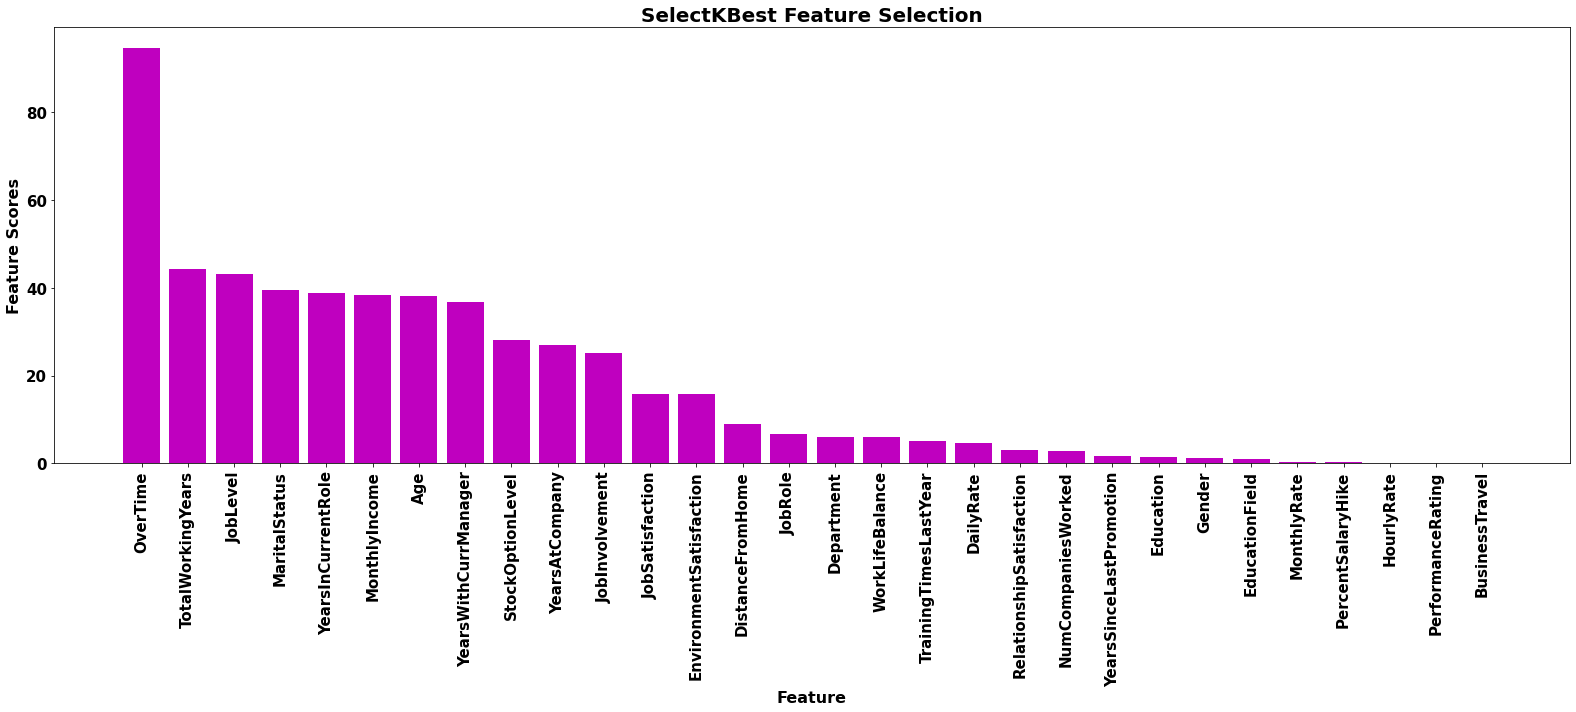

In [69]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **3 Features with least score based on selectKbest algorithm are 'HourlyRate', 'PerformanceRating' and 'BusinessTravel'**

# Checking top features using Feature Importance - Extra Tree Classifier

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs     Score
0                   OverTime  0.069788
1                        Age  0.046049
2              MonthlyIncome  0.042039
3           DistanceFromHome  0.037678
4          TotalWorkingYears  0.036859
5            JobSatisfaction  0.036742
6             YearsAtCompany  0.036719
7    EnvironmentSatisfaction  0.036643
8                  DailyRate  0.034415
9                   JobLevel  0.034102
10            JobInvolvement  0.034007
11      YearsWithCurrManager  0.033923
12        NumCompaniesWorked  0.033468
13             MaritalStatus  0.033046
14                   JobRole  0.032964
15          StockOptionLevel  0.032636
16           WorkLifeBalance  0.032587
17            EducationField  0.032476
18  RelationshipSatisfaction  0.032368
19         PercentSalaryHike  0.031661
20        YearsInCurrentRole  0.031312
21                HourlyRate  0.030564
22   YearsSinceLastPromotion  0.029636
23               MonthlyRate  0.029085
24     TrainingTimesLastYear  0.028942
25                 Education  0.028163
26            BusinessTravel  0.024102
27                Department  0.023697
28                    Gender  0.021443
29         PerformanceRating  0.012887

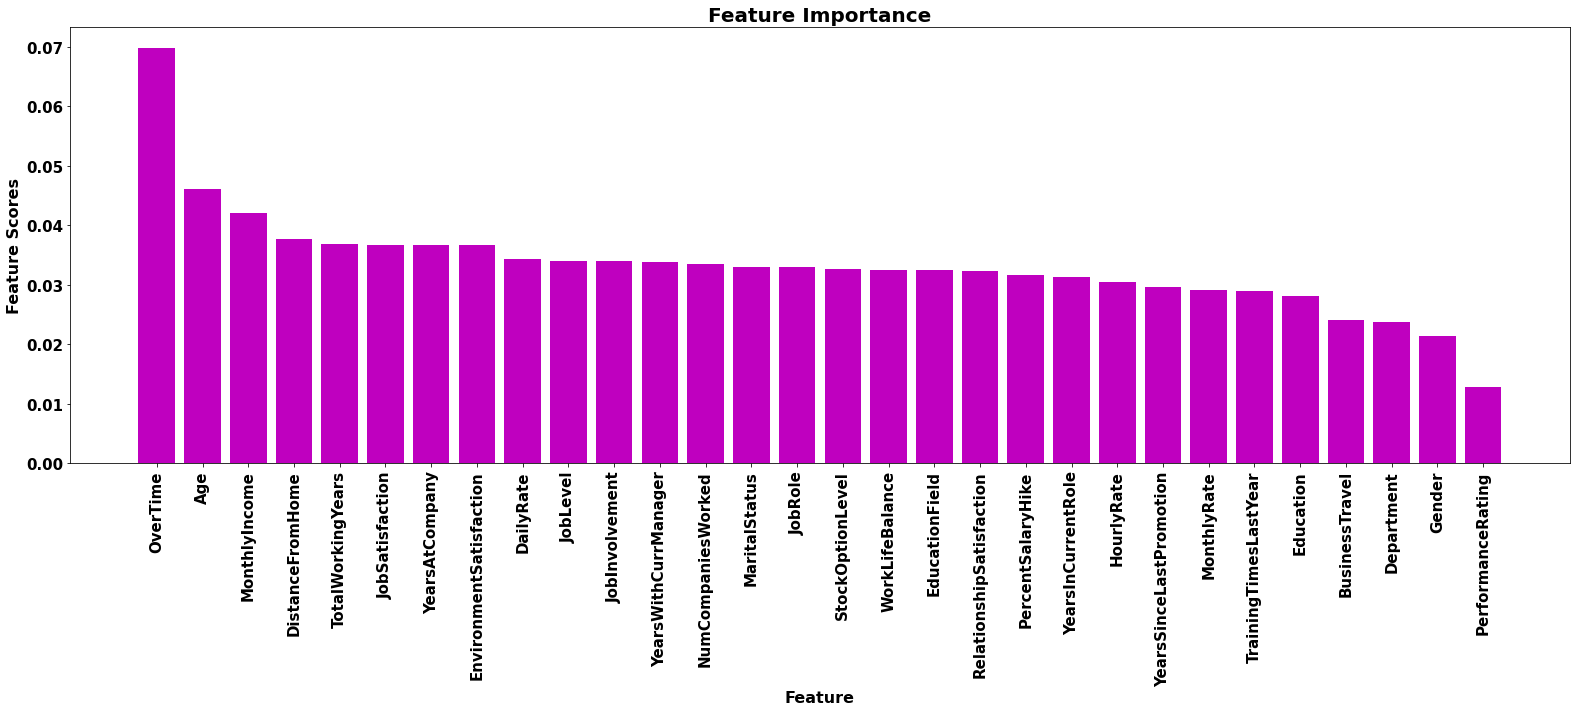

In [71]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("Feature Importance",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **3 Features with least score based on Feature Importance with Extra Tree Classifier are 'Gender', 'PerformanceRating' and 'BusinessTravel'**
- **As 'PerformanceRating' and 'BusinessTravel' are the features with lowest scores coming in all checked feature selection techniques, hence dropping these two columns from the dataset**

In [72]:
df.drop(["BusinessTravel","PerformanceRating"],axis=1, inplace=True)
df.head(3)

Age  Attrition  DailyRate  Department  DistanceFromHome  Education  \
0   41        1.0       1102         2.0                 1          2   
1   49        0.0        279         1.0                 8          1   
2   37        1.0       1373         1.0                 2          2   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             1.0                        2     0.0          94   
1             1.0                        3     1.0          61   
2             4.0                        4     1.0          92   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2      7.0                4            2.0   
1               2         2      6.0                2            1.0   
2               2         1      2.0                3            2.0   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8       1.0   
1           5130        24907                   1       0.0   
2           2090         2396                   6       1.0   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0                 11                         1                 0   
1                 23                         4                 1   
2                 15                         2                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0

In [73]:
df.shape

(1470, 29)

# Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [74]:
# We calculate VIF only for numerical data as the variance is applicable only for numerical data

In [75]:
# Identifying the columns with numerical data after dropping the columns identified in previous steps

In [76]:
df_numerical.shape

(1470, 14)

In [77]:
# Looping to get the list of numerical variables left in the dataset after dropping columns based on previous steps
df_num_filter=[]
for i in df_numerical.columns:
    for j in df.columns:
        if i==j:
            df_num_filter.append(i)
print(len(df_num_filter))
display(df_num_filter)

14


['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [78]:
df_vif=df[df_num_filter]
df_vif.head(5)

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [79]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_vif[list(df_vif.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF                   Column
0   25.496860                      Age
7   13.578688        PercentSalaryHike
8   13.311109        TotalWorkingYears
10  10.485271           YearsAtCompany
3    9.767720               HourlyRate
4    7.286833            MonthlyIncome
13   6.380952     YearsWithCurrManager
11   6.342271       YearsInCurrentRole
9    5.302141    TrainingTimesLastYear
5    4.737393              MonthlyRate
1    4.721572                DailyRate
6    2.675998       NumCompaniesWorked
12   2.437206  YearsSinceLastPromotion
2    2.271398         DistanceFromHome

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As there are multiple features with VIF values > 10, I will use PCA to reduce the no. of features**
- **I will apply PCA at the end of EDA after scaling the data**

# Checking Outliers

In [80]:
# We check outliers on numerical data
df_outliers=df_vif.copy()
df_outliers.head(5)

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [81]:
df_outliers.shape

(1470, 14)

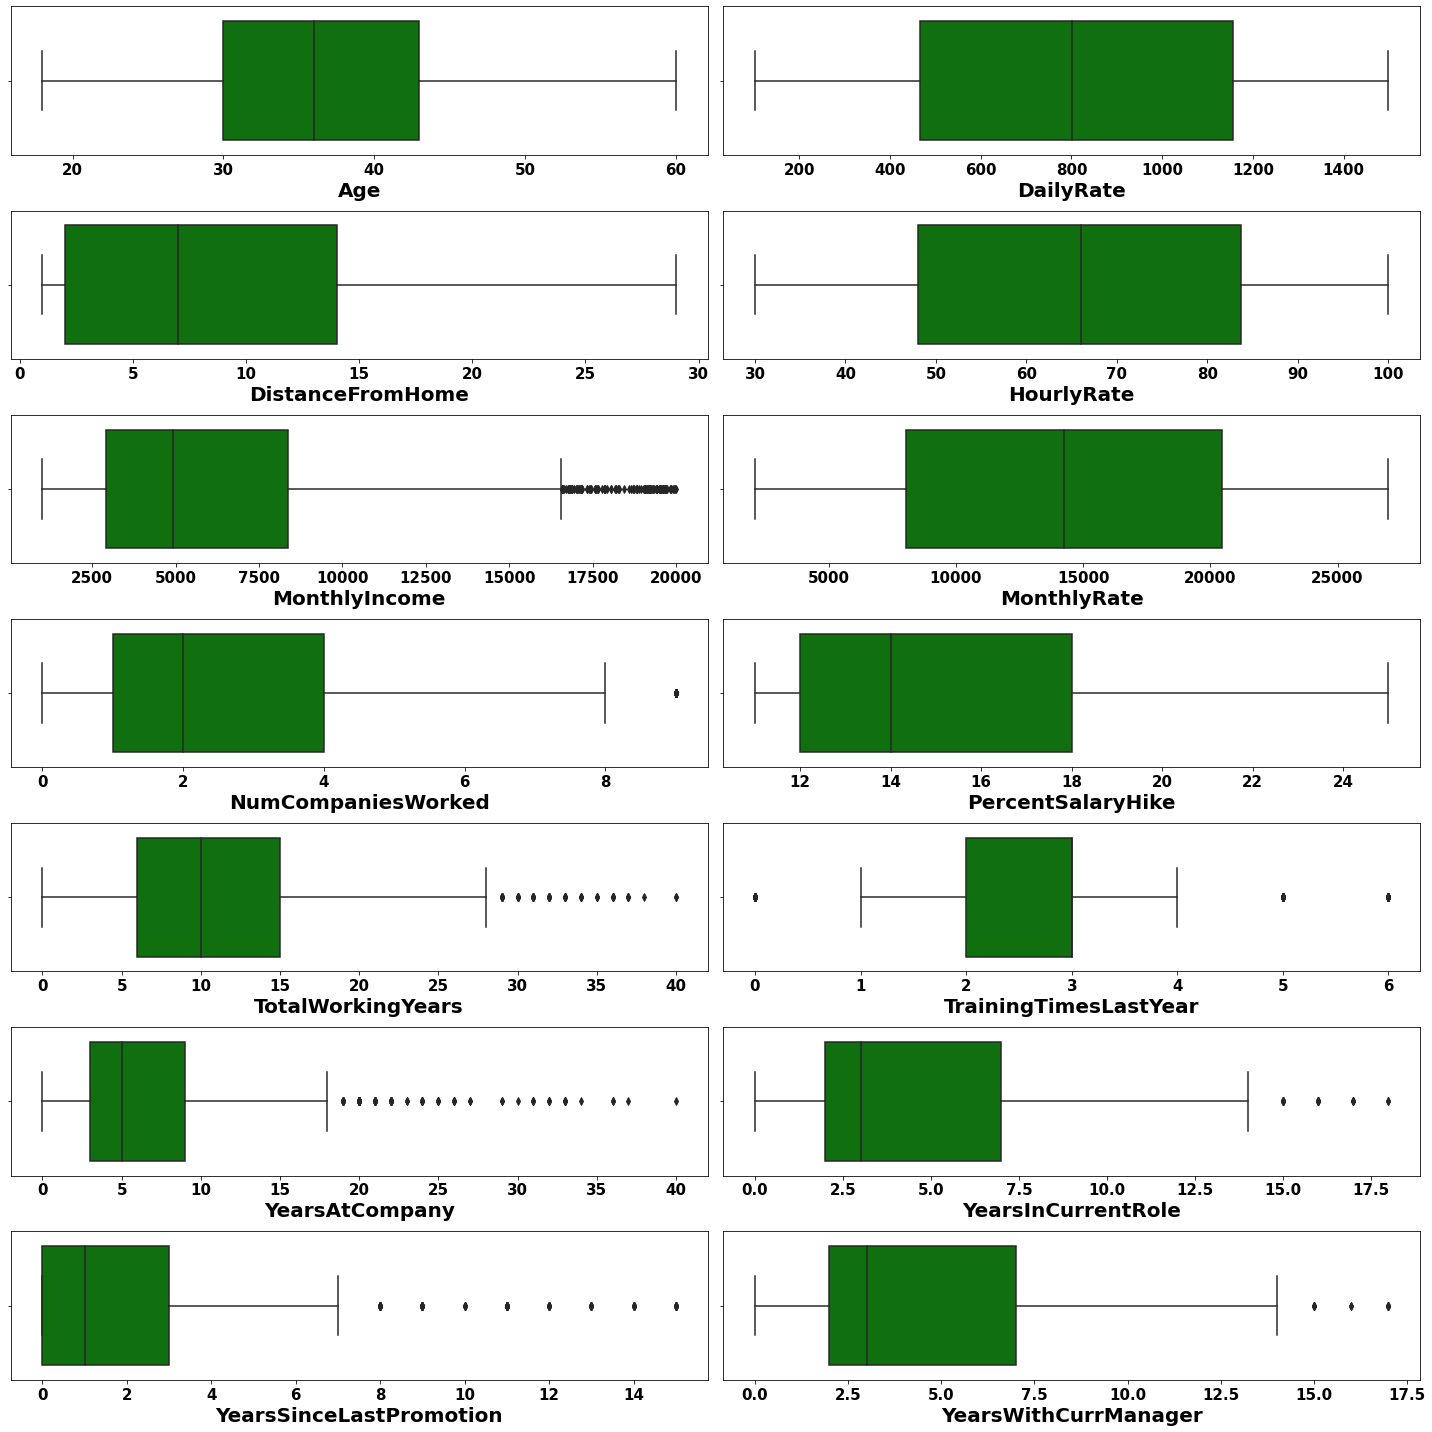

In [82]:
# Checking outliers visually
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=20:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in many columns**

# Removing Outliers using z-score method

In [83]:
df_outliers.shape

(1470, 14)

In [84]:
df.shape

(1470, 29)

In [85]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([13, 12, 10, 12, 11, 12,  8,  8, 10, 12, 11, 12, 13,  8, 10, 12, 13,
        12,  8, 13, 10, 11, 12, 11, 13, 10, 12,  8, 10, 11, 12, 12, 13,  8,
        10, 10, 12, 12,  8, 11, 10, 10, 12, 10, 13, 12, 10,  8, 10, 12, 13,
         8

In [86]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_1=df[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

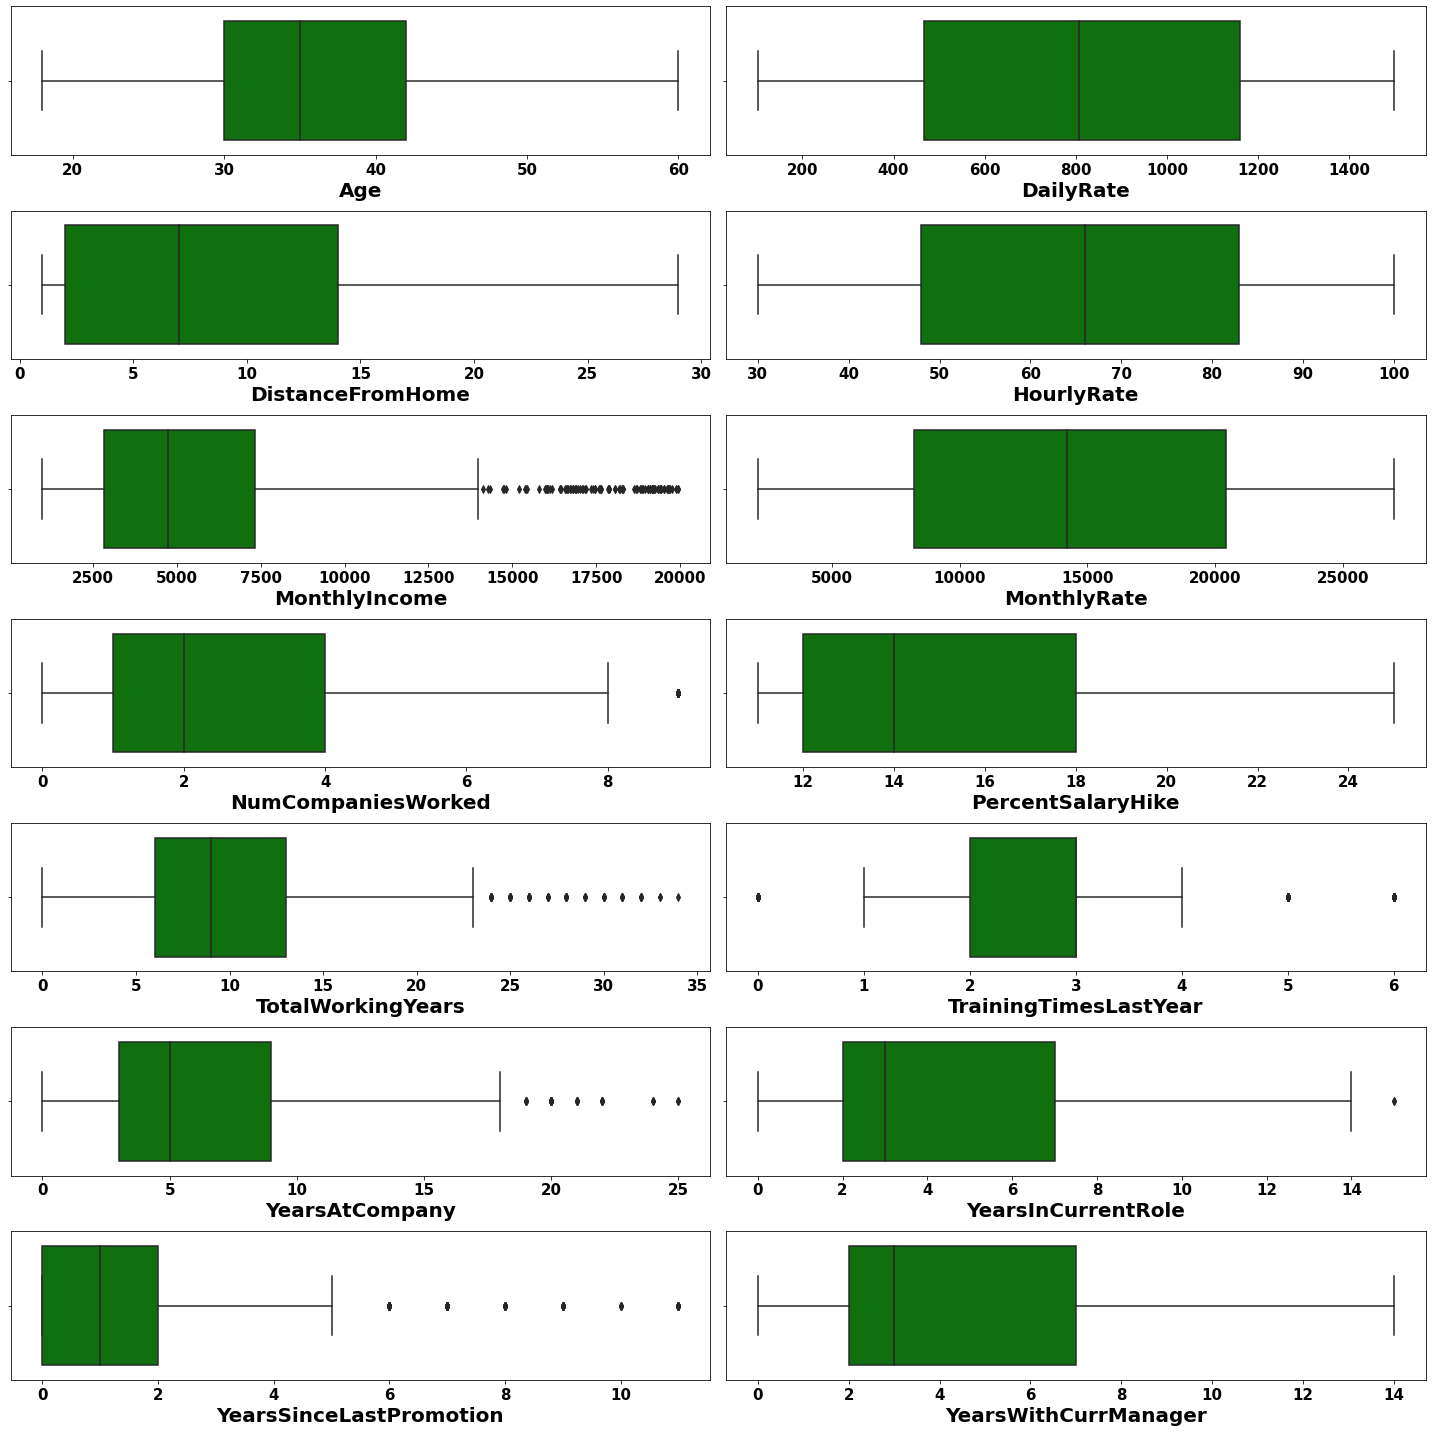

In [87]:
# Checking outliers visually
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=20:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(df_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [88]:
df_1.shape

(1387, 29)

In [89]:
df.shape

(1470, 29)

In [90]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df.shape[0]-df_1.shape[0])/df.shape[0]*100,1)
loss_percent_zscore

5.6

#### Observations:
- **Data loss with z-score method is 5.6%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

# Removing Outliers using IQR method

In [91]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_2 = df[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

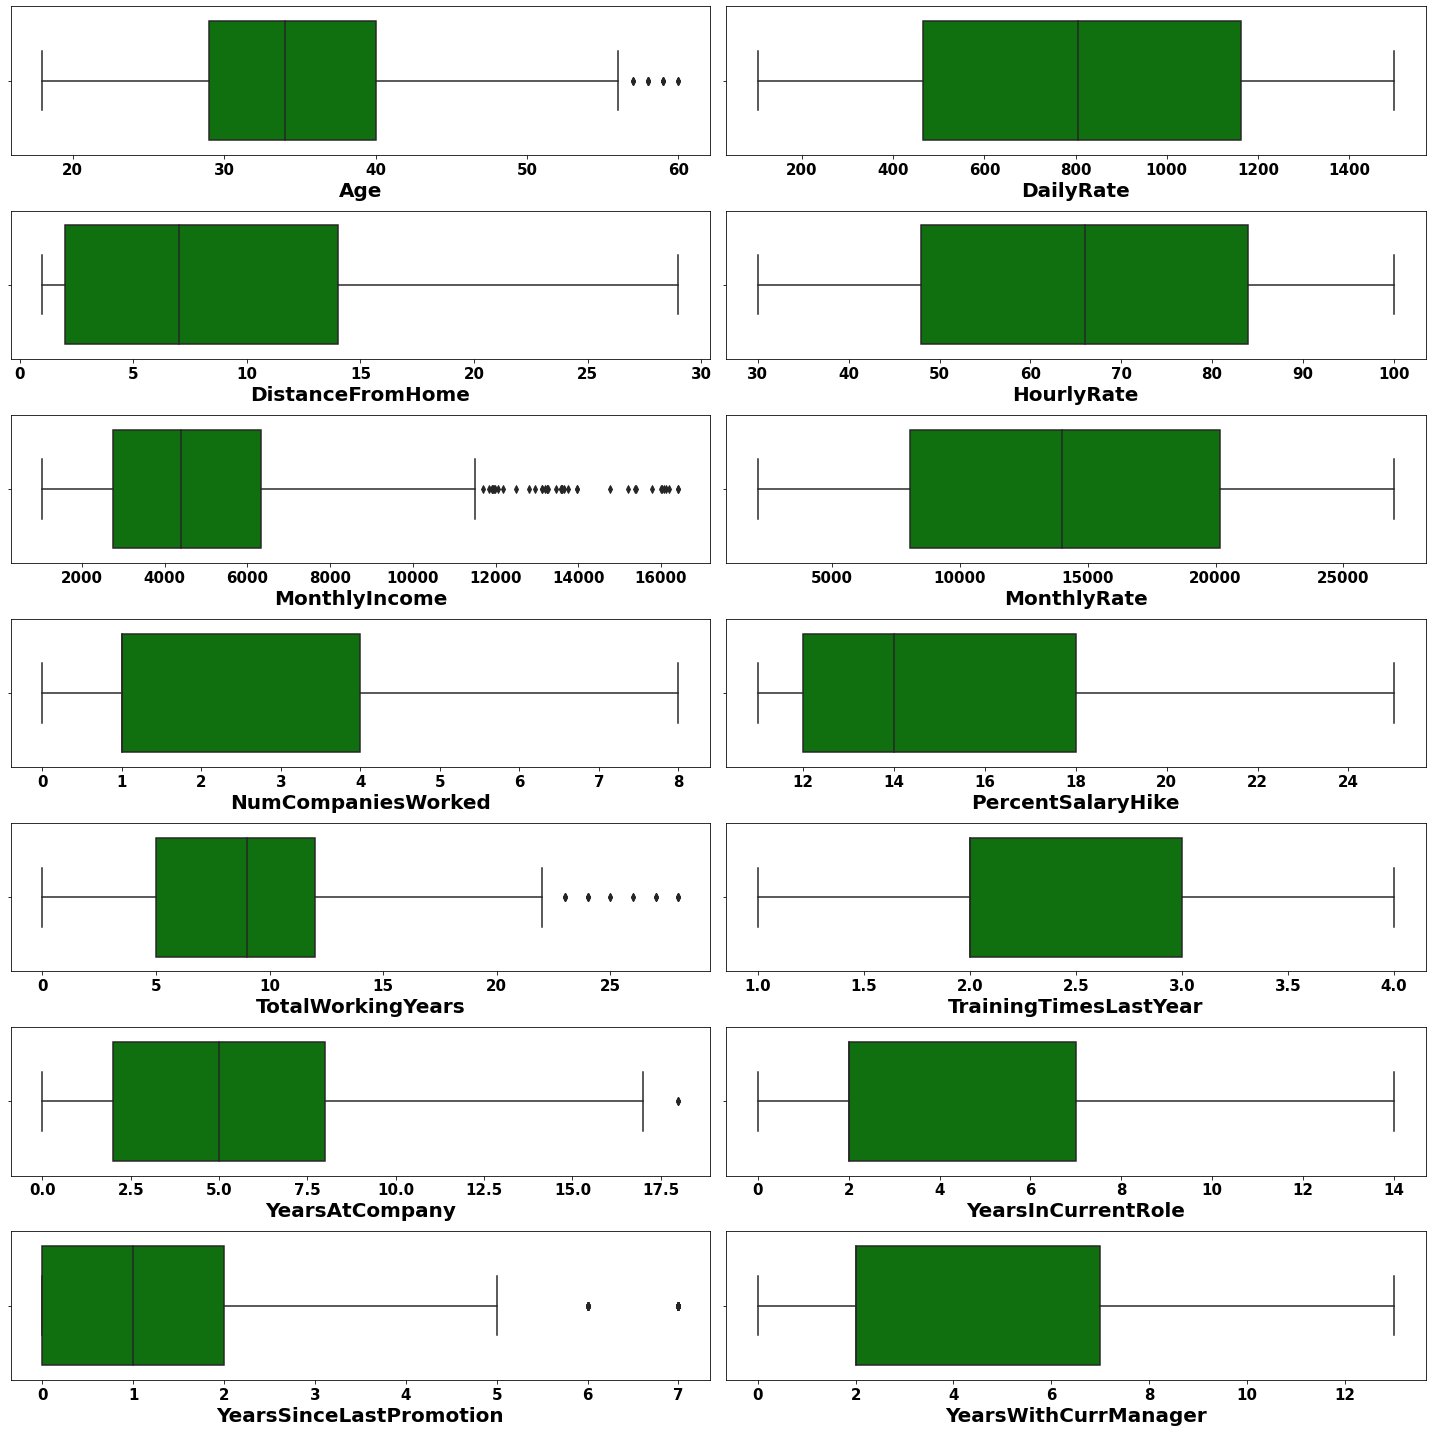

In [92]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=20:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(df_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from all features based on IQR range**

In [93]:
df_2.shape

(985, 29)

In [94]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df.shape[0]-df_2.shape[0])/df.shape[0]*100,1)
display(loss_percent_IQR)

33.0

#### Observations: 
- **Data loss with IQR is 33.0% which is higher than data loss with z-score (5.6%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [95]:
x=df_1.drop(['Attrition'],axis=1)
y=df_1["Attrition"].copy()
df=df_1

In [96]:
df=df_1.copy()

# Skewness Check

In [97]:
df_outliers.shape

(1470, 14)

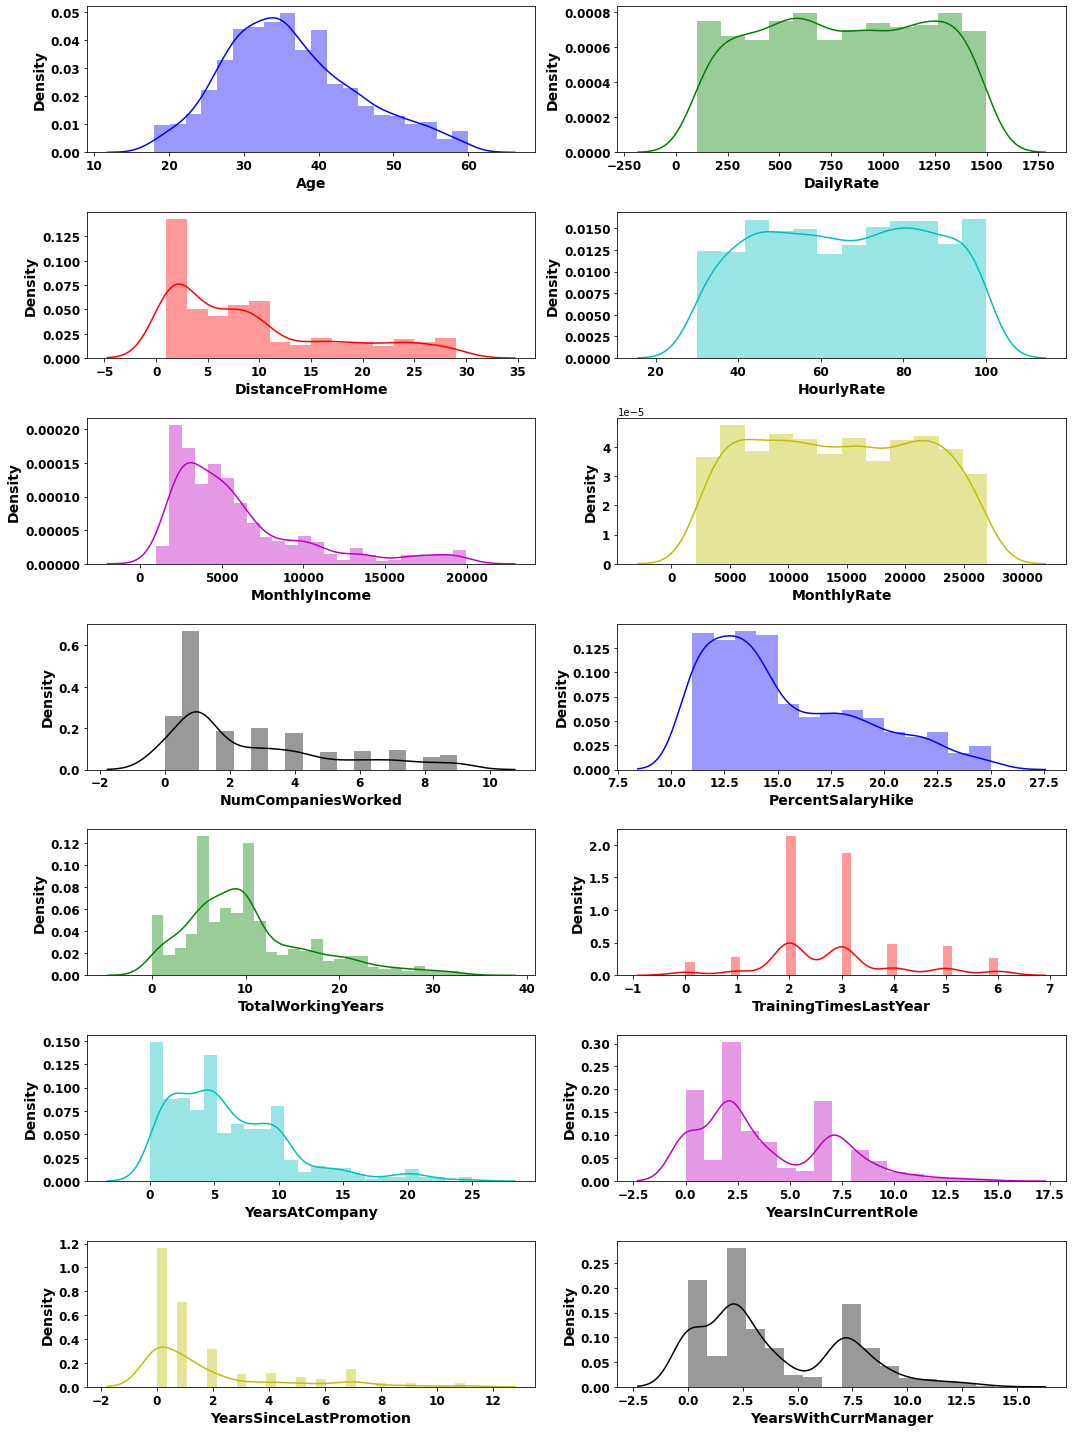

In [98]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_outliers_del.columns:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [99]:
df_outliers_del.skew().sort_values(ascending=False) 

YearsSinceLastPromotion    1.756335
MonthlyIncome              1.544770
YearsAtCompany             1.248623
NumCompaniesWorked         1.037715
TotalWorkingYears          1.034487
DistanceFromHome           0.954752
PercentSalaryHike          0.800592
YearsInCurrentRole         0.726675
YearsWithCurrManager       0.694506
TrainingTimesLastYear      0.577614
Age                        0.472280
MonthlyRate                0.030596
DailyRate                 -0.017078
HourlyRate                -0.030481
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various methods to remove skewness and will consider the one with lowest skewness**

# Transforming data to reduce skewness

In [100]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_outliers_del)
x_tra=pd.DataFrame(data=x_pwr,columns=df_outliers_del.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

YearsSinceLastPromotion    0.212301
PercentSalaryHike          0.112128
TrainingTimesLastYear      0.057949
MonthlyIncome              0.027700
NumCompaniesWorked         0.016175
Age                       -0.004079
DistanceFromHome          -0.008149
TotalWorkingYears         -0.009666
YearsAtCompany            -0.025230
YearsInCurrentRole        -0.069631
YearsWithCurrManager      -0.070570
HourlyRate                -0.105678
MonthlyRate               -0.176560
DailyRate                 -0.199742
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**
- **Skewness range: (-0.21,+0.21) which is within the range of -0.5 to 0.5 which is fairly symmetrical**

In [101]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_outliers_del)
x_qtr=pd.DataFrame(data=x_qt,columns=df_outliers_del.columns)
x_qtr.skew().sort_values(ascending=False)

TrainingTimesLastYear      0.092056
TotalWorkingYears          0.000840
Age                        0.000466
HourlyRate                 0.000340
MonthlyIncome              0.000025
MonthlyRate               -0.000038
DailyRate                 -0.000097
YearsAtCompany            -0.000252
YearsSinceLastPromotion   -0.014596
NumCompaniesWorked        -0.040327
PercentSalaryHike         -0.113215
DistanceFromHome          -0.114697
YearsInCurrentRole        -0.146191
YearsWithCurrManager      -0.160393
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**
- **Skewness range: (-0.16,+0.16) which is within the acceptable range of -0.5 to +0.5**
- **Quantile Tranformer has reduced skewness better than PowerTranformer, hence using the data from Quantile transformer**

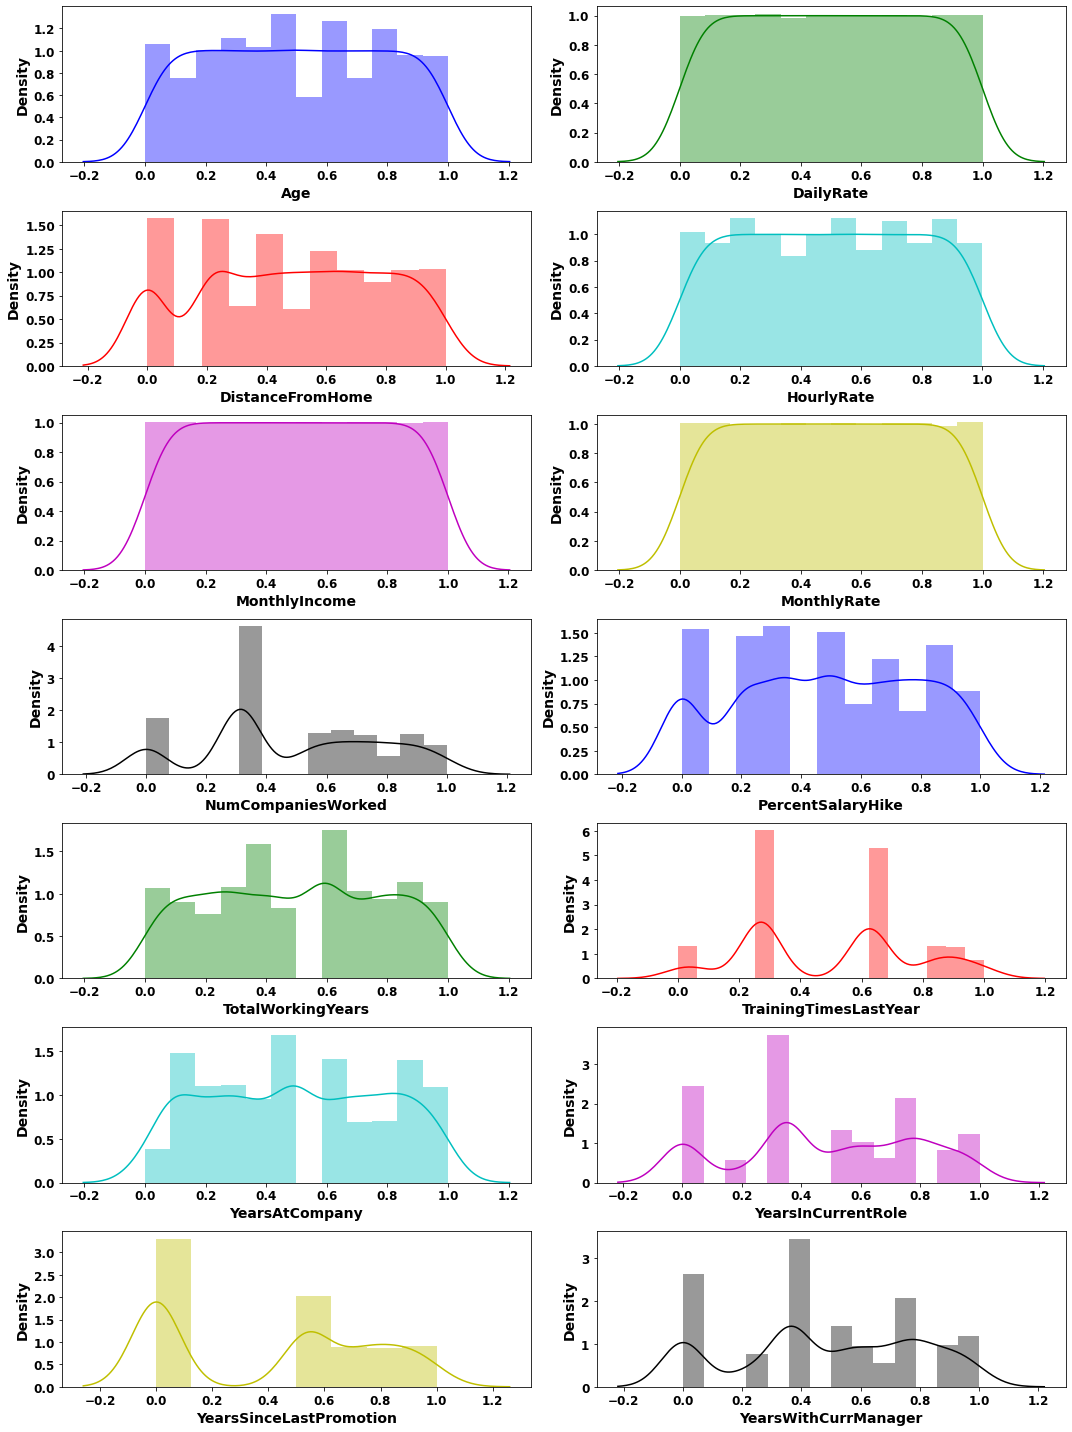

In [102]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "Quantile transformer" for most of the features, I am using transformed x data from "Quantile transformer" for model building**   

### Grouping both transformed numerical and categorical data 

In [103]:
x.shape

(1387, 28)

In [104]:
x.head() # entire x data including both numerical and categorical features

Age  DailyRate  Department  DistanceFromHome  Education  EducationField  \
0   41       1102         2.0                 1          2             1.0   
1   49        279         1.0                 8          1             1.0   
2   37       1373         1.0                 2          2             4.0   
3   33       1392         1.0                 3          4             1.0   
4   27        591         1.0                 2          1             3.0   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2     0.0          94               3         2   
1                        3     1.0          61               2         2   
2                        4     1.0          92               2         1   
3                        4     0.0          56               3         1   
4                        1     1.0          40               3         1   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0      7.0                4            2.0           5993        19479   
1      6.0                2            1.0           5130        24907   
2      2.0                3            2.0           2090         2396   
3      6.0                3            1.0           2909        23159   
4      2.0                2            1.0           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  RelationshipSatisfaction  \
0                   8       1.0                 11                         1   
1                   1       0.0                 23                         4   
2                   6       1.0                 15                         2   
3                   1       1.0                 11                         3   
4                   9       0.0                 12                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [105]:
new_x=x.reset_index(drop=True)  # reset the index of x data

In [106]:
new_x.head() # entire x data including both numerical and categorical features after resetting the index

Age  DailyRate  Department  DistanceFromHome  Education  EducationField  \
0   41       1102         2.0                 1          2             1.0   
1   49        279         1.0                 8          1             1.0   
2   37       1373         1.0                 2          2             4.0   
3   33       1392         1.0                 3          4             1.0   
4   27        591         1.0                 2          1             3.0   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2     0.0          94               3         2   
1                        3     1.0          61               2         2   
2                        4     1.0          92               2         1   
3                        4     0.0          56               3         1   
4                        1     1.0          40               3         1   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0      7.0                4            2.0           5993        19479   
1      6.0                2            1.0           5130        24907   
2      2.0                3            2.0           2090         2396   
3      6.0                3            1.0           2909        23159   
4      2.0                2            1.0           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  RelationshipSatisfaction  \
0                   8       1.0                 11                         1   
1                   1       0.0                 23                         4   
2                   6       1.0                 15                         2   
3                   1       1.0                 11                         3   
4                   9       0.0                 12                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [107]:
x_qtr.head()  # Transformed numerical data

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.729730   0.704440          0.000000    0.899399       0.653676   
1  0.895896   0.119093          0.553554    0.431431       0.550539   
2  0.591091   0.912913          0.214214    0.872873       0.049528   
3  0.392893   0.925550          0.314314    0.358859       0.262262   
4  0.133634   0.348837          0.214214    0.123624       0.333868   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0     0.705663            0.947447           0.000000           0.413413   
1     0.935299            0.313814           0.966967           0.592593   
2     0.010530            0.858358           0.588589           0.346847   
3     0.867768            0.313814           0.000000           0.413413   
4     0.603219            1.000000           0.207207           0.272773   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0               0.000000        0.585586            0.617117   
1               0.625125        0.834835            0.775776   
2               0.625125        0.000000            0.000000   
3               0.625125        0.705706            0.775776   
4               0.625125        0.200200            0.349850   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                 0.000000              0.669670  
1                 0.540040              0.772272  
2                 0.000000              0.000000  
3                 0.796296              0.000000  
4                 0.722222              0.365365

In [108]:
for i in x_qtr.columns:
    new_x[i]=x_qtr[i]

In [109]:
new_x.head()  # Grouped x data with tranformed numerical data and categorical data

Age  DailyRate  Department  DistanceFromHome  Education  \
0  0.729730   0.704440         2.0          0.000000          2   
1  0.895896   0.119093         1.0          0.553554          1   
2  0.591091   0.912913         1.0          0.214214          2   
3  0.392893   0.925550         1.0          0.314314          4   
4  0.133634   0.348837         1.0          0.214214          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             1.0                        2     0.0    0.899399   
1             1.0                        3     1.0    0.431431   
2             4.0                        4     1.0    0.872873   
3             1.0                        4     0.0    0.358859   
4             3.0                        1     1.0    0.123624   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2      7.0                4            2.0   
1               2         2      6.0                2            1.0   
2               2         1      2.0                3            2.0   
3               3         1      6.0                3            1.0   
4               3         1      2.0                2            1.0   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0       0.653676     0.705663            0.947447       1.0   
1       0.550539     0.935299            0.313814       0.0   
2       0.049528     0.010530            0.858358       1.0   
3       0.262262     0.867768            0.313814       1.0   
4       0.333868     0.603219            1.000000       0.0   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0           0.000000                         1                 0   
1           0.966967                         4                 1   
2           0.588589                         2                 0   
3           0.000000                         3                 0   
4           0.207207                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           0.413413               0.000000                1        0.585586   
1           0.592593               0.625125                3        0.834835   
2           0.346847               0.625125                3        0.000000   
3           0.413413               0.625125                3        0.705706   
4           0.272773               0.625125                3        0.200200   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.617117                 0.000000              0.669670  
1            0.775776                 0.540040              0.772272  
2            0.000000                 0.000000              0.000000  
3            0.775776                 0.796296              0.000000  
4            0.349850                 0.722222              0.365365

In [110]:
new_x.shape

(1387, 28)

In [111]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

# Scaling data

In [112]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

Age  DailyRate  Department  DistanceFromHome  Education  \
0  0.795502   0.707698    1.405373         -1.611416  -0.876177   
1  1.370984  -1.318517   -0.496337          0.209305  -1.853858   
2  0.315356   1.429342   -0.496337         -0.906833  -0.876177   
3 -0.371062   1.473086   -0.496337         -0.577589   1.079185   
4 -1.268952  -0.523243   -0.496337         -0.906833  -1.853858   

   EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0       -0.940815                -0.665328 -1.229911    1.381240   
1       -0.940815                 0.251978  0.813067   -0.237241   
2        1.305159                 1.169285  0.813067    1.289497   
3       -0.940815                 1.169285 -1.229911   -0.488236   
4        0.556501                -1.582635  0.813067   -1.301804   

   JobInvolvement  JobLevel   JobRole  JobSatisfaction  MaritalStatus  \
0        0.376231  0.043309  1.007448         1.143776       1.231027   
1       -1.034126  0.043309  0.604178        -0.673426      -0.141509   
2       -1.034126 -0.941432 -1.008901         0.235175       1.231027   
3        0.376231 -0.941432  0.604178         0.235175      -0.141509   
4        0.376231 -0.941432 -1.008901        -0.673426      -0.141509   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0       0.531975     0.711912            1.534122  1.584737   
1       0.174949     1.506800           -0.597278 -0.631019   
2      -1.559392    -1.694304            1.234447  1.584737   
3      -0.822975     1.273042           -0.597278  1.584737   
4      -0.575098     0.357298            1.710897 -0.631019   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0          -1.619768                 -1.575817         -0.929427   
1           1.575205                  1.199034          0.238250   
2           0.324998                 -0.650866         -0.929427   
3          -1.619768                  0.274084         -0.929427   
4          -0.935131                  1.199034          0.238250   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.300280              -1.797614        -2.501172        0.298164   
1           0.321482               0.447721         0.336558        1.161793   
2          -0.531269               0.447721         0.336558       -1.730843   
3          -0.300280               0.447721         0.336558        0.714371   
4          -0.788310               0.447721         0.336558       -1.037166   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.430355                -1.122755              0.602067  
1            0.945951                 0.338651              0.931649  
2           -1.575101                -1.122755             -1.549053  
3            0.945951                 1.032108             -1.549053  
4           -0.438188                 0.831655             -0.375423

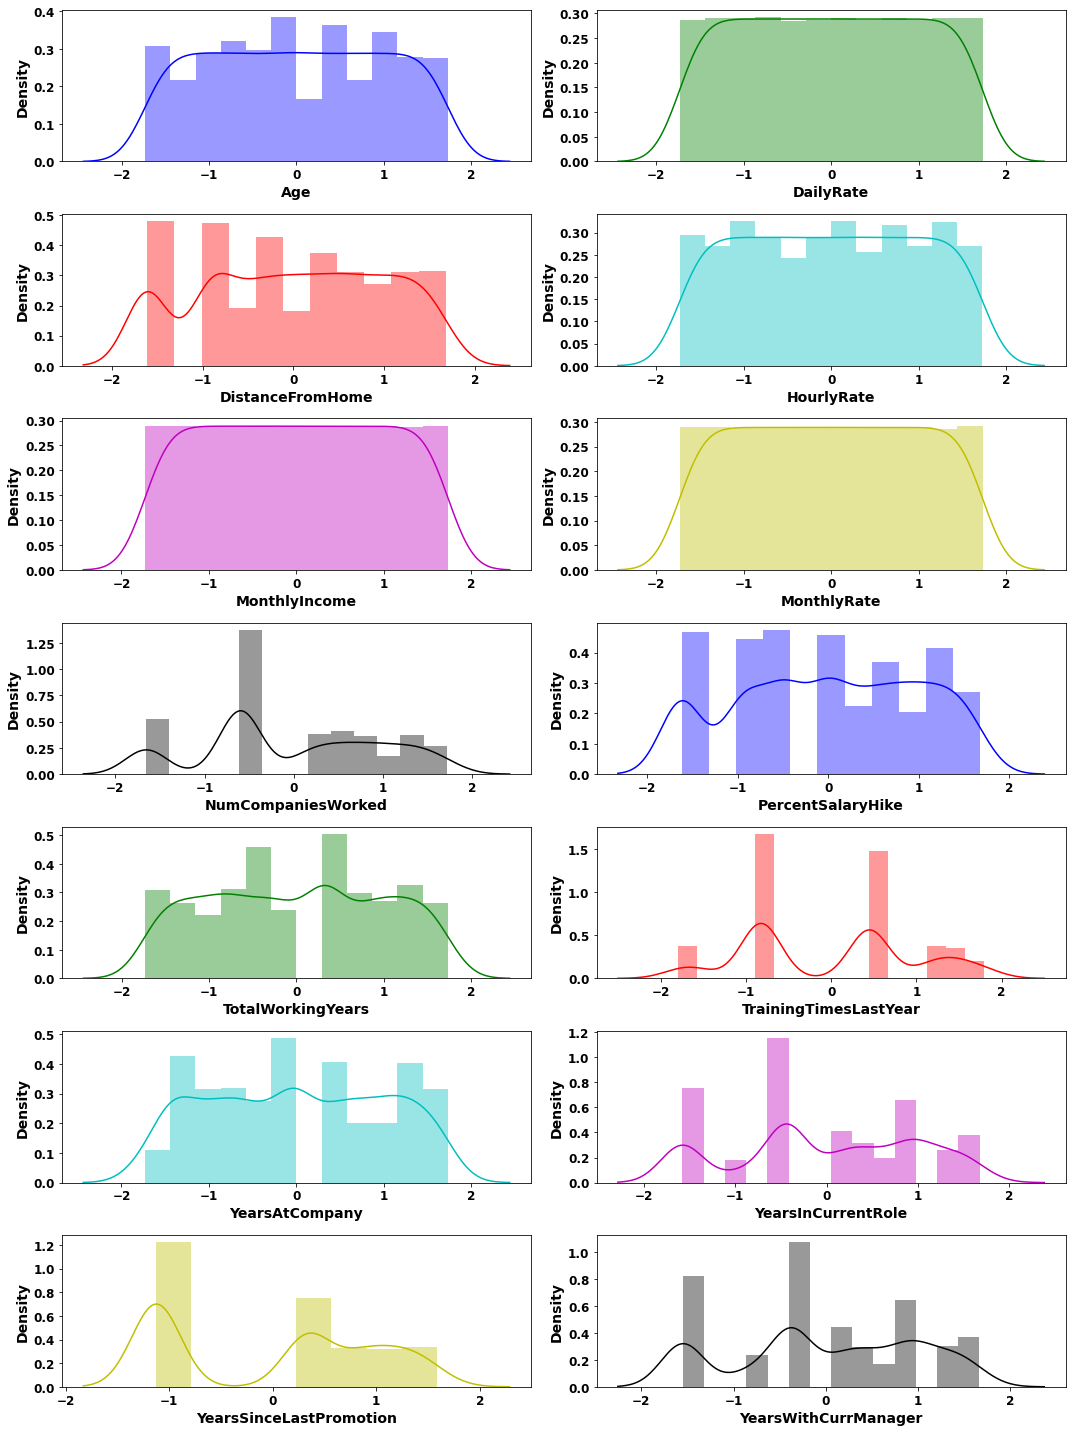

In [113]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Principal Component Analysis (PCA)

- **As the dataset has many X columns with multi-collinearity, I will use PCA technique to reduce the number of dimensions in a dataset while preserving the most important information in it**
- **Initially, I will calculate the number of components needed to explain the variance**
- **Based on that, I will choose no. of columns required be used in PCA**

In [114]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

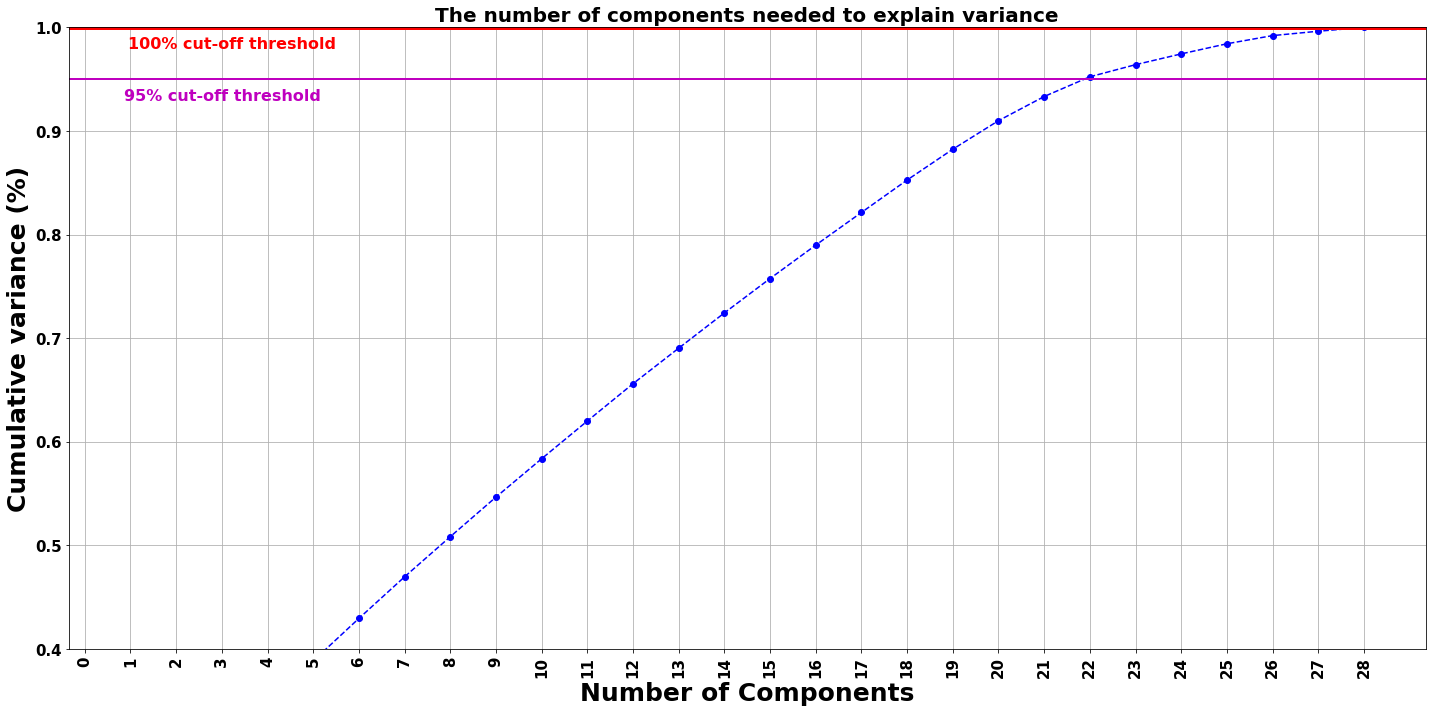

In [115]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, x.shape[1]+1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=25,fontweight ='bold')
plt.xticks(np.arange(0, x.shape[1]+1, step=1)) 
plt.ylabel('Cumulative variance (%)',fontsize=25,fontweight ='bold')
plt.title('The number of components needed to explain variance',fontsize=20,fontweight ='bold')
plt.axhline(y=1, color='r', linestyle='-',linewidth = '5')
plt.text(0.95, 0.98, '100% cut-off threshold', color = 'red', fontsize=16,fontweight ='bold')
plt.axhline(y=0.95, color='m', linestyle='-',linewidth = '2')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'm', fontsize=16,fontweight ='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.grid(axis = 'x')
plt.grid(True)
plt.ylim(0.4,1.0)
plt.tight_layout()
plt.show()

#### Observations:
- **As per the graph, we can see that 22 principal components attribute for 95% of variation in the data. Hence I will pick 22 components for our prediction**
- **I will use 22 features as no. of components in PCA to reduce the dimensions**

In [116]:
# Applying PCA transformation on X data to reduce the no. of columns
pca=PCA(n_components=22)
x=pca.fit_transform(x)
x=pd.DataFrame(x)
x.head()

0         1         2         3         4         5         6   \
0  0.484557  0.493668 -2.197915 -0.032492  1.464821 -2.259671 -0.387768   
1  1.490625 -0.907710  0.207621 -0.299529 -0.143890  0.602950  0.950205   
2 -3.316147  1.633662  0.186339 -1.354643  0.949626  0.730529 -0.294384   
3 -0.432202 -0.953561 -0.250481 -0.374272  1.769743  0.649915 -0.865757   
4 -1.721925 -0.001591  1.075196 -0.678682 -0.607116  1.066989  0.386513   

         7         8         9         10        11        12        13  \
0  1.059139  0.493441  2.724143 -0.726877 -2.707264 -1.275629  0.613428   
1  1.071920 -0.933480 -1.961203  0.305070  0.258197  1.178091 -1.176088   
2 -1.993250  1.969663  0.770231  1.202722 -1.003492  0.059797 -0.423069   
3  0.015842 -0.697379  1.914406 -2.071248  0.687854 -0.500442 -0.145211   
4 -0.853596 -0.999769 -1.122375 -0.509303 -0.768284  0.893234  1.012767   

         14        15        16        17        18        19        20  \
0  0.079994  0.262936 -0.962186  0.443779  0.509012 -1.192664  1.588529   
1  1.844363  0.150495 -0.798573 -0.059262  0.405028 -0.780114  0.842287   
2 -0.325656  1.882656  0.162801 -0.458327 -0.579791 -1.140573  0.531069   
3  0.260506  0.028457  0.805665  0.792684 -1.485810 -0.548822 -0.670573   
4 -0.223800 -1.882978 -1.083976  0.643338  0.563772 -1.891657 -0.218483   

         21  
0 -0.337631  
1  1.435142  
2  0.011436  
3  0.192237  
4 -1.335101

#### Observations:
- **After applying PCA transformation, X dataset is reduced to 22 dimensions. This X data can be used for model training**

In [117]:
#checking multicollinearity after applying pca
X = x[list(x.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF  Column
18  1.0      18
16  1.0      16
15  1.0      15
0   1.0       0
10  1.0      10
20  1.0      20
19  1.0      19
13  1.0      13
12  1.0      12
11  1.0      11
9   1.0       9
8   1.0       8
7   1.0       7
6   1.0       6
4   1.0       4
3   1.0       3
2   1.0       2
21  1.0      21
1   1.0       1
5   1.0       5
17  1.0      17
14  1.0      14

#### Observations:
- **we can see that the multicollinearity is addressed now**

# SMOTE for classfication

As the target variable classes are imbalanced, used the random oversampling technique "SMOTE" for balancing the classes in target variable

In [118]:
# Checking the value count of target column
y.value_counts()

0.0    1158
1.0     229
Name: Attrition, dtype: int64

In [119]:
x.shape

(1387, 22)

In [120]:
y.shape

(1387,)

In [121]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [122]:
# Checking the value count of target column
y.value_counts()

1.0    1158
0.0    1158
Name: Attrition, dtype: int64

#### Observations: 
- **Classes are balanced in the target column**

In [123]:
x.shape

(2316, 22)

In [124]:
y.shape

(2316,)

1.0    1158
0.0    1158
Name: Attrition, dtype: int64


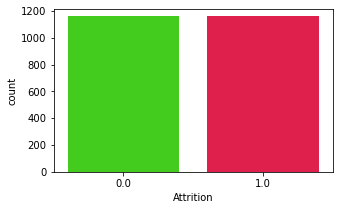

In [125]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y.value_counts())
sns.countplot(y,palette='prism')
plt.show()

#### Observations: 
- **Classes are balanced in the target column**

#### EDA part is completed and I will proceed with Model Building

# Model Building

In [126]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

In [149]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score, f1_score, roc_auc_score

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append(abs((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


Random State  Training Accuracy  Testing Accuracy  Difference
1             27          80.183585         80.172414    0.011172
4            232          80.183585         80.172414    0.011172
0             19          80.615551         80.603448    0.012102
2            108          80.615551         80.603448    0.012102
7            542          80.615551         80.603448    0.012102
3            193          80.831533         80.818966    0.012568
6            317          80.831533         80.818966    0.012568
8            571          80.831533         80.818966    0.012568
11           806          80.777538         80.818966    0.041428
12           811          80.777538         80.818966    0.041428
13           985          80.777538         80.818966    0.041428
14           989          80.777538         80.818966    0.041428
5            263          80.561555         80.603448    0.041893
9            714          80.561555         80.603448    0.041893
10           770          80.561555         80.603448    0.041893

#### Observations: 
- **From the above table, as multple random states give same training and testing accuarcy scores, taking one of this  from the below code**

In [150]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

27

#### Observations: 
- **Considering random state=27 for the model building**

In [151]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [152]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred_test))
f1_Score_sel=f1_score(y_test,pred_test,average='weighted')
print("F1 Score:",f1_score(y_test,pred_test,average='weighted'))
precision_score_sel=precision_score(y_test,pred_test,average='weighted')
print("Precision Score:",precision_score(y_test,pred_test,average='weighted'))
recall_score_sel=recall_score(y_test,pred_test,average='weighted')
print("Recall Score:",recall_score(y_test,pred_test,average='weighted'))
roc_auc_score_sel=roc_auc_score(y_test,pred_test)
print("ROC AUC Score:",roc_auc_score(y_test,pred_test))

Accuracy Score: 0.8017241379310345
F1 Score: 0.802197915379228
Precision Score: 0.8045771756978654
Recall Score: 0.8017241379310345
ROC AUC Score: 0.8031850961538463


In [153]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       256
         1.0       0.76      0.82      0.79       208

    accuracy                           0.80       464
   macro avg       0.80      0.80      0.80       464
weighted avg       0.80      0.80      0.80       464



In [154]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[202  54]
 [ 38 170]]


# Cross Validation for Logistic Regression

In [155]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


No of Folds  Cross Validation Score  Model Score  Difference
7            9               80.181783    80.172414    0.000094
5            7               80.009286    80.172414    0.001631
2            4               79.922280    80.172414    0.002501
6            8               79.921698    80.172414    0.002507
3            5               79.836617    80.172414    0.003358
1            3               79.835924    80.172414    0.003365
8           10               79.705553    80.172414    0.004669
4            6               79.576857    80.172414    0.005956
0            2               79.274611    80.172414    0.008978

#### Observations: 
- **Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=9 from the above table**

In [156]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

9

In [157]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 80.18178344845616 
The accuracy score is: 80.17241379310344
Difference is: -9.36965535270895e-05


# Other Classification Algorithms

In [158]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]

# Defining empty lists
Model=[lr]
CV_Score=[round((lsscore_selected*100),2)]
Model_Score=[round((lss*100),2)]
Difference=[round(abs(lss-lsscore_selected),2)]

f1_score_all=[round((f1_Score_sel*100),2)]
precision_score_all=[round((precision_score_sel*100),2)]
recall_score_all=[round((recall_score_sel*100),2)]
roc_auc_score_all=[round((roc_auc_score_sel*100),2)]



# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    MScore=accuracy_score(y_test,pred_test)*100
    Model_Score.append(round(accuracy_score(y_test,pred_test)*100,2))  # Appending "Accuracy score" to the list
    
    f1_scr=f1_score(y_test,pred_test,average='weighted')*100
    precision_scr=precision_score(y_test,pred_test,average='weighted')*100
    recall_scr=recall_score(y_test,pred_test,average='weighted')*100
    roc_auc_scr=roc_auc_score(y_test,pred_test)*100
    
    f1_score_all.append(round(f1_scr,2)) 
    precision_score_all.append(round(precision_scr,2)) 
    recall_score_all.append(round(recall_scr,2)) 
    roc_auc_score_all.append(round(roc_auc_scr,2)) 
    
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()*100         # Cross Validation mean score calculation
    CV_Score.append(round(score,2))                                # Appending "cross validation score" to the list
    dif=round(abs(MScore-score),2)
    Difference.append(dif) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Accuracy Score':Model_Score,'CV Accuracy Score':CV_Score,'Difference':Difference,
                          'F1 Score':f1_score_all,'Recall Score':recall_score_all,'Precision Score':precision_score_all,'ROC AUC Score':roc_auc_score_all})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
82.11206896551724
Confusion Matrix:
[[206  50]
 [ 33 175]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       256
         1.0       0.78      0.84      0.81       208

    accuracy                           0.82       464
   macro avg       0.82      0.82      0.82       464
weighted avg       0.82      0.82      0.82       464

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
81.68103448275862
Confusion Matrix:
[[198  58]
 [ 27 181]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       256
         1.0       0.76      0.87      0.81       208

    accuracy                           0.82       464
   macro avg       0.82      0.82      0.82       464
weighted avg       0.83      0.82      0.82       464

-----------------------------------

Model  Model Accuracy Score  CV Accuracy Score  \
0           LogisticRegression()                 80.17              80.18   
6       RandomForestClassifier()                 93.75              93.27   
5                          SVC()                 91.38              90.85   
10               XGBClassifier()                 92.24              92.79   
8   GradientBoostingClassifier()                 85.99              86.75   
1                   GaussianNB()                 82.11              81.22   
9           AdaBoostClassifier()                 80.82              79.66   
2     Decision Tree Classifier()                 81.68              82.90   
4                SGDClassifier()                 71.77              73.84   
7         ExtraTreesClassifier()                 94.40              96.59   
3         KNeighborsClassifier()                 79.09              82.25   

    Difference  F1 Score  Recall Score  Precision Score  ROC AUC Score  
0         0.00     80.22         80.17            80.46          80.32  
6         0.48     93.76         93.75            93.88          93.93  
5         0.53     91.40         91.38            91.64          91.65  
10        0.55     92.26         92.24            92.62          92.61  
8         0.75     86.03         85.99            86.57          86.40  
1         0.89     82.16         82.11            82.42          82.30  
9         1.16     80.87         80.82            81.39          81.17  
2         1.22     81.73         81.68            82.50          82.18  
4         2.07     71.80         71.77            72.97          72.39  
7         2.19     94.41         94.40            94.55          94.61  
3         3.16     78.66         79.09            85.45          81.01

#### Observations: 
- **Difference between Model Accuarcy Score and Cross-validation score is less for all the models**
- **ExtraTreesClassifier has highest Model Accuracy Score, cross validation score, F1 Score, Recall Score, Precision Score and ROC AUC Score compared to other models, hence selected ExtraTreesClassifier as the best model for Hyper Parameter Tuning.**
- **Hyper parameter tuning will be pefromed for "ExtraTreesClassifier"**

## Hyper Parameter Tuning

In [162]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesClassifier

# Number of trees in Extra Tree
n_estimators = [50,100,200,300]
# Scoring criterion
criterion=["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [None,2,3,4,5,7,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [163]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [164]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesClassifier(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy Score:",acc*100)
print("F1 Score:",(f1_score(y_test,pred,average='weighted'))*100)
print("Precision Score:",(precision_score(y_test,pred,average='weighted'))*100)
print("Recall Score:",(recall_score(y_test,pred,average='weighted'))*100)
print("ROC AUC Score:",(roc_auc_score(y_test,pred))*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 96.33620689655173
F1 Score: 96.34112934404226
Precision Score: 96.39011539341004
Recall Score: 96.33620689655173
ROC AUC Score: 96.45432692307692
[[244  12]
 [  5 203]]
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       256
         1.0       0.94      0.98      0.96       208

    accuracy                           0.96       464
   macro avg       0.96      0.96      0.96       464
weighted avg       0.96      0.96      0.96       464



In [165]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 96.33064881006244 
The accuracy score is: 96.33620689655173
Difference is: 5.5580864892879056e-05


#### Observations for Hyper Parameter Tuning: 
- **Hyper Parameter Tuned model with ExtraTreesClassifier has highest score compared to the model with default parameters, hence considering the model with hyper parameters tuned as the final model for saving**

# AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

Plotting AUC ROC Curve helps in comparing the performance among multiple models. The model with higher AUC is the best model.

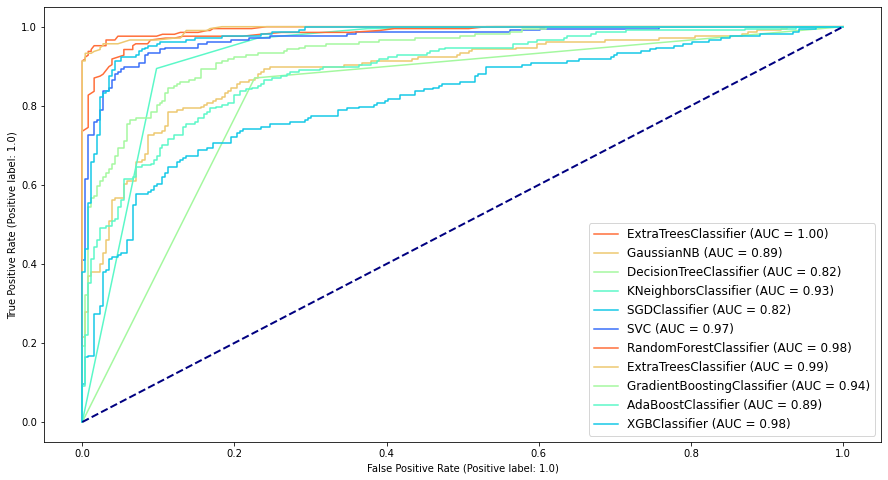

In [176]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 8)) # Set the figure size to 10 inches by 10 inches

# models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
#        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
#        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Initially Plotting the AUC ROC curve for Extra Trees Classifier which is best model identified so far
disp = plot_roc_curve(ht_model, x_test, y_test, ax=ax)

# Plotting the AUC ROC curve for remaining models with same axis of Extra Trees Classifier
plot_roc_curve(models[0][1], x_test, y_test, ax=ax)
plot_roc_curve(models[1][1], x_test, y_test, ax=ax)
plot_roc_curve(models[2][1], x_test, y_test, ax=ax)
plot_roc_curve(models[3][1], x_test, y_test, ax=ax)
plot_roc_curve(models[4][1], x_test, y_test, ax=ax)
plot_roc_curve(models[5][1], x_test, y_test, ax=ax)
plot_roc_curve(models[6][1], x_test, y_test, ax=ax)
plot_roc_curve(models[7][1], x_test, y_test, ax=ax)
plot_roc_curve(models[8][1], x_test, y_test, ax=ax)
plot_roc_curve(models[9][1], x_test, y_test, ax=ax)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(prop={'size': 12}, loc='lower right')
plt.show()

#### Observations:
- **Many models are performing well.**
- **RandomForestClassifier, ExtraTreesClassifier and XGBClassifier are the best one among all models from this plot based on AUC ROC score** 
- **ExtraTreesClassifier from hyper parameter tuning is selected as the final model for deployment based on checking of all the metrics (Model Accuracy Score, cross validation score, F1 Score, Recall Score, Precision Score and ROC AUC Score)**

# Model Saving

In [177]:
import pickle
filename='HR-Attrition-Analytics.pkl'
pickle.dump(ht_model, open(filename,'wb'))  # saving the Extra Trees Classifier model

# Conclusion

In [179]:
loaded_model=pickle.load(open('HR-Attrition-Analytics.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Score:",result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T.head()

Model Score: 96.33620689655173


Predicted  Original
0        0.0       0.0
1        0.0       0.0
2        0.0       0.0
3        1.0       1.0
4        0.0       0.0

#### Overall Summary:

- **First I had loaded the dataset and completed the Data Visualization based on the target variable (Attrition).**

- **Then, I proceeded further with Exploratory Data Analysis and prepared the model for training and testing**

- **Tested multiple classification algorithms including ensemble techniques and based on the values of different metrics, I have considered  ExtraTreesClassifier as the best performing model among all algorithms**

- **After finding out the best model, I tried to increase the score by using Hyperparameter Tuning technique and the score is improved compared to the the model with default paratmeters**

- **The final model is saved as pickle file**